In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# Analyze engine data

In [2]:
engine1 = pd.read_csv("UIPA.HMD8310H.Engine1.csv")
engine1.shape

/tmp/ipykernel_15473/2363869710.py:1: DtypeWarning: Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386

(443252, 702)

In [3]:
engine1["battery_only"] = engine1["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)

In [4]:
for column in engine1.columns:
    print(column)

Unnamed: 0
time
aIAirTemperatureTCInlet
aIBaseDurationGasAdmission
aIChargeAirPressureEngineInlet
aIChargeAirSetpointBarMPa
aIChargeAirTemperatureEngineInlet
aICounterStarts
aICounterStartsX10000
aICrankcasePressure
aICyclicSlowTurningResult
aICyclicSlowTurningState
aIDVTControlAirPressure
aIDurationOffsetGasAdmissionCylinderA01
aIDurationOffsetGasAdmissionCylinderA02
aIDurationOffsetGasAdmissionCylinderA03
aIDurationOffsetGasAdmissionCylinderA04
aIDurationOffsetGasAdmissionCylinderA05
aIDurationOffsetGasAdmissionCylinderA06
aIDurationOffsetGasAdmissionCylinderA07
aIDurationOffsetGasAdmissionCylinderA08
aIDurationOffsetGasAdmissionCylinderA09
aIDurationOffsetPilotInjectionCylinderA01
aIDurationOffsetPilotInjectionCylinderA02
aIDurationOffsetPilotInjectionCylinderA03
aIDurationOffsetPilotInjectionCylinderA04
aIDurationOffsetPilotInjectionCylinderA05
aIDurationOffsetPilotInjectionCylinderA06
aIDurationOffsetPilotInjectionCylinderA07
aIDurationOffsetPilotInjectionCylinderA08
aIDurationOff

In [5]:
engine1.head()

Unnamed: 0                         time  aIAirTemperatureTCInlet  \
0           0  2022-10-21T07:23:01.001000Z                     28.8   
1           1  2022-10-21T07:24:01.001000Z                     29.0   
2           2  2022-10-21T07:25:01.001000Z                     28.9   
3           3  2022-10-21T07:26:01.001000Z                     29.1   
4           4  2022-10-21T07:27:01.001000Z                     28.9   

   aIBaseDurationGasAdmission  aIChargeAirPressureEngineInlet  \
0                         0.0                            1.03   
1                         0.0                            1.03   
2                         0.0                            1.03   
3                         0.0                            1.03   
4                         0.0                            1.02   

   aIChargeAirSetpointBarMPa  aIChargeAirTemperatureEngineInlet  \
0                       1.05                               37.5   
1                       1.05                               37.5   
2                       1.05                               37.5   
3                       1.05                               37.5   
4                       1.04                               37.5   

   aICounterStarts  aICounterStartsX10000  aICrankcasePressure  ...  \
0            592.0                    0.0                 -0.5  ...   
1            592.0                    0.0                 -0.5  ...   
2            592.0                    0.0                 -0.5  ...   
3            592.0                    0.0                 -0.5  ...   
4            592.0                    0.0                 -0.5  ...   

   dITestModeActiveEvent  dITestModeActiveSB  dITurningGearEngagedSB  \
0                  False               False                   False   
1                  False               False                   False   
2                  False               False                   False   
3                  False               False                   False   
4                  False               False                   False   

   dIUPSAlarmAlarm  dIWastegateDriverFailureAlarm  \
0            False                          False   
1            False                          False   
2            False                          False   
3            False                          False   
4            False                          False   

   dIWireBreakEmergencyStopFromRemote2Alarm  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   dIYardMainGasValveClosedInGasOperationGasTrip  dateTime  \
0                                          False       NaN   
1                                          False       NaN   
2                                          False       NaN   
3                                          False       NaN   
4                                          False       NaN   

            valuestreamname  battery_only  
0  UIPA.HMD8310H.Engine1.VS             0  
1  UIPA.HMD8310H.Engine1.VS             0  
2  UIPA.HMD8310H.Engine1.VS             0  
3  UIPA.HMD8310H.Engine1.VS             0  
4  UIPA.HMD8310H.Engine1.VS             0  

[5 rows x 703 columns]

In [6]:
engine2 = pd.read_csv("UIPA.HMD8310H.Engine2.csv")
engine2.shape

/tmp/ipykernel_15473/3469547296.py:1: DtypeWarning: Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386

(443369, 702)

In [7]:
engine2["battery_only"] = engine2["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)

In [8]:
engine2.head()

Unnamed: 0                         time  aIAirTemperatureTCInlet  \
0           0  2022-10-21T07:23:01.001000Z                     29.4   
1           1  2022-10-21T07:24:01.001000Z                     29.4   
2           2  2022-10-21T07:25:01.001000Z                     29.4   
3           3         2022-10-21T07:26:01Z                     29.4   
4           4         2022-10-21T07:27:01Z                     29.5   

   aIBaseDurationGasAdmission  aIChargeAirPressureEngineInlet  \
0                         0.0                            1.02   
1                         0.0                            1.02   
2                         0.0                            1.02   
3                         0.0                            1.02   
4                         0.0                            1.02   

   aIChargeAirSetpointBarMPa  aIChargeAirTemperatureEngineInlet  \
0                       1.05                               33.2   
1                       1.05                               33.2   
2                       1.05                               33.2   
3                       1.05                               33.2   
4                       1.05                               33.2   

   aICounterStarts  aICounterStartsX10000  aICrankcasePressure  ...  \
0            433.0                    0.0                 -0.4  ...   
1            433.0                    0.0                 -0.4  ...   
2            433.0                    0.0                 -0.4  ...   
3            433.0                    0.0                 -0.4  ...   
4            433.0                    0.0                 -0.4  ...   

   dITestModeActiveEvent  dITestModeActiveSB  dITurningGearEngagedSB  \
0                  False               False                   False   
1                  False               False                   False   
2                  False               False                   False   
3                  False               False                   False   
4                  False               False                   False   

   dIUPSAlarmAlarm  dIWastegateDriverFailureAlarm  \
0            False                          False   
1            False                          False   
2            False                          False   
3            False                          False   
4            False                          False   

   dIWireBreakEmergencyStopFromRemote2Alarm  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   dIYardMainGasValveClosedInGasOperationGasTrip  dateTime  \
0                                          False       NaN   
1                                          False       NaN   
2                                          False       NaN   
3                                          False       NaN   
4                                          False       NaN   

            valuestreamname  battery_only  
0  UIPA.HMD8310H.Engine2.VS             0  
1  UIPA.HMD8310H.Engine2.VS             0  
2  UIPA.HMD8310H.Engine2.VS             0  
3  UIPA.HMD8310H.Engine2.VS             0  
4  UIPA.HMD8310H.Engine2.VS             0  

[5 rows x 703 columns]

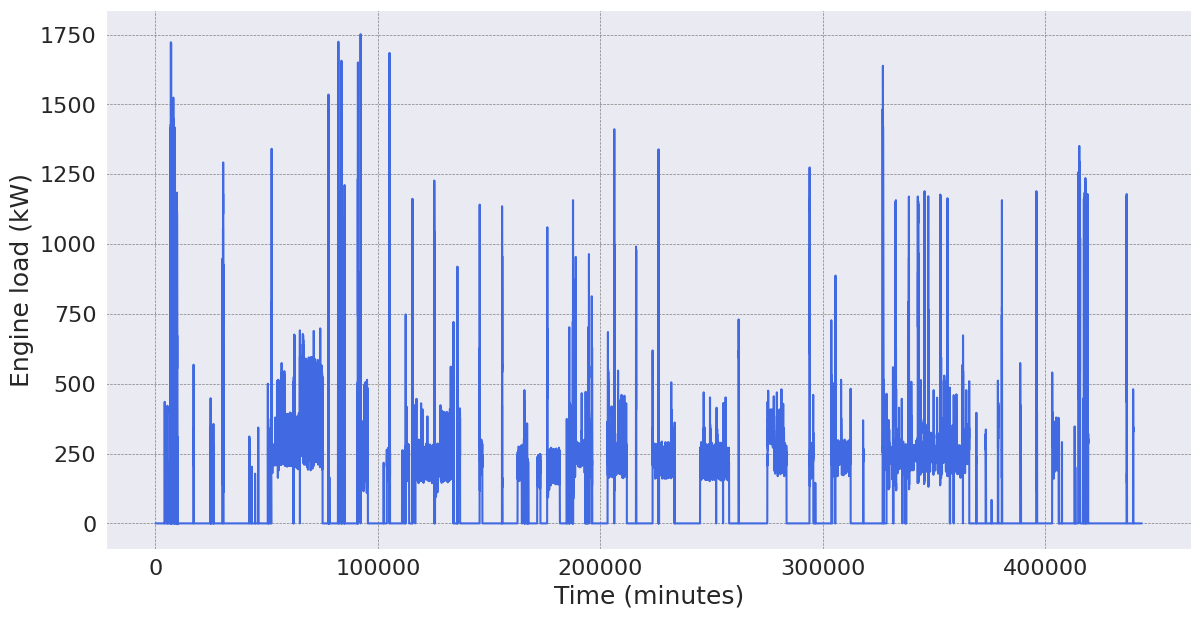

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(engine2["aIEngineLoad"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Engine load (kW)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


In [10]:
merged_df = pd.merge(engine1[["aIEngineLoad", "time", "battery_only"]], engine2[["aIEngineLoad", "time"]], on='time', how='inner')
merged_df["total_load"] = merged_df["aIEngineLoad_x"] + merged_df["aIEngineLoad_y"]
merged_df.shape

(369304, 5)

In [11]:
merged_df_all_columns = pd.merge(engine1, engine2, on='time', how='inner')
merged_df_all_columns["total_load"] = merged_df_all_columns["aIEngineLoad_x"] + merged_df_all_columns["aIEngineLoad_y"]
merged_df_all_columns.shape

(369304, 1406)

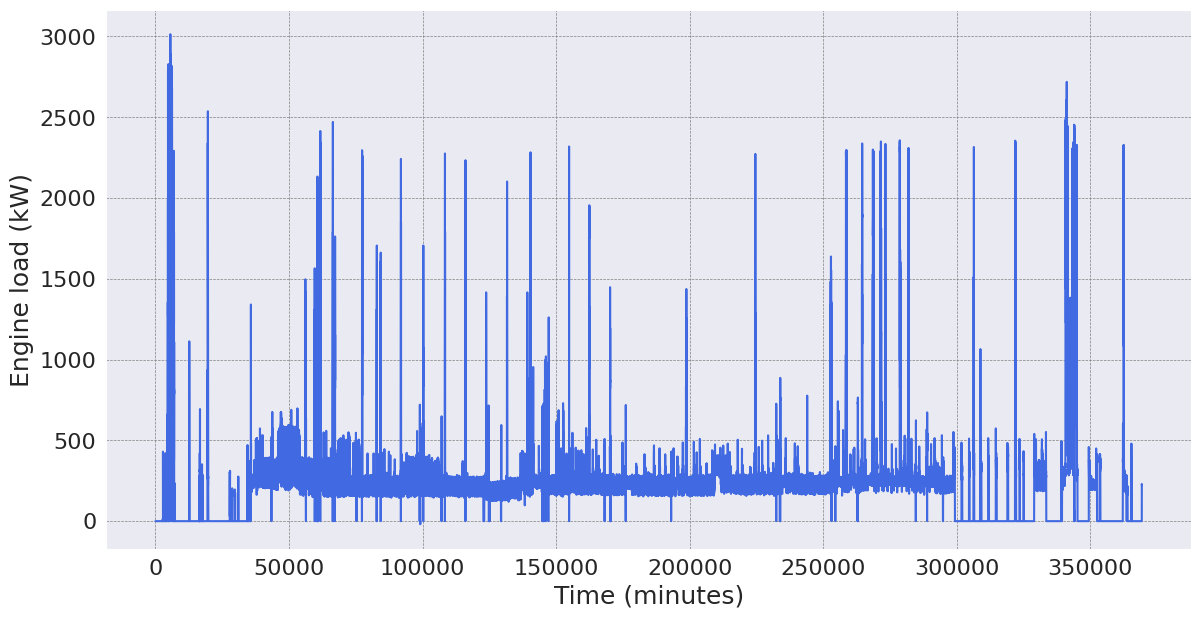

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(merged_df["total_load"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Engine load (kW)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


In [13]:
# merged_df[merged_df["battery_only"]==1]["battery_only"].plot()
merged_df[merged_df["battery_only"]==1][merged_df[merged_df["battery_only"]==1]["total_load"]==0]

aIEngineLoad_x                         time  battery_only  \
2840               0.0  2022-10-24T05:22:00.002000Z             1   
2841               0.0  2022-10-24T05:23:00.002000Z             1   
2842               0.0  2022-10-24T05:24:00.001000Z             1   
2843               0.0  2022-10-24T05:25:00.002000Z             1   
2844               0.0  2022-10-24T05:26:00.003000Z             1   
...                ...                          ...           ...   
145176             0.0  2023-03-07T11:55:55.001000Z             1   
145177             0.0         2023-03-07T11:56:55Z             1   
309227             0.0         2023-07-17T06:00:00Z             1   
363621             0.0         2023-08-24T00:37:00Z             1   
363622             0.0         2023-08-24T00:38:00Z             1   

        aIEngineLoad_y  total_load  
2840               0.0         0.0  
2841               0.0         0.0  
2842               0.0         0.0  
2843               0.0         0.0  
2844               0.0         0.0  
...                ...         ...  
145176             0.0         0.0  
145177             0.0         0.0  
309227             0.0         0.0  
363621             0.0         0.0  
363622             0.0         0.0  

[177 rows x 5 columns]

In [14]:
merged_df.describe()

aIEngineLoad_x   battery_only  aIEngineLoad_y     total_load
count   369291.000000  369304.000000   369302.000000  369291.000000
mean       108.498236       0.000498      106.533311     215.030851
std        160.590200       0.022316      160.485158     225.119601
min        -34.000000       0.000000       -1.000000     -19.000000
25%          0.000000       0.000000        0.000000     180.000000
50%          0.000000       0.000000        0.000000     225.000000
75%        223.000000       0.000000      228.000000     248.000000
max       1706.000000       1.000000     1751.000000    3014.000000

# Analyze fuel and engine data combined

In [15]:
mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")
mgo["total_vol"] = mgo["MGO_STOR_TK_C_CALC_VOL"] + mgo["MGO_STOR_TK_S_CALC_VOL"] + mgo["NO1_MGO_SERV_TK_CALC_VOL"] + mgo["NO2_MGO_SERV_TK_CALC_VOL"]

/tmp/ipykernel_15473/3850218066.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

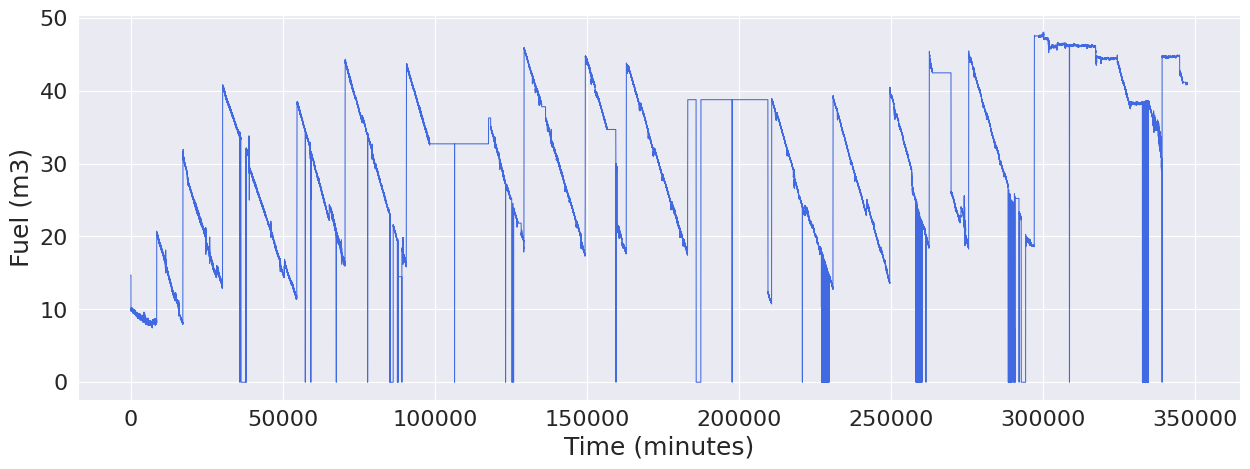

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
mgo["total_vol"].plot(color='royalblue', linewidth='0.75')

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Fuel (m3)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [17]:
engine_and_fuel_df = pd.merge(merged_df, mgo[["total_vol", "time"]], on='time', how='inner')
engine_and_fuel_df.shape

(107225, 6)

In [18]:
engine_and_fuel_df_all_columns = pd.merge(merged_df_all_columns, mgo[["total_vol", "time"]], on='time', how='inner')
engine_and_fuel_df_all_columns.shape

(107225, 1407)

In [19]:
numeric_columns = engine_and_fuel_df_all_columns.select_dtypes(include=['number'])
numeric_columns["total_vol_diff"] = numeric_columns["total_vol"].diff()
numeric_columns["total_vol_diff"].iloc[:-1] = numeric_columns["total_vol_diff"].iloc[1:].values
corr = numeric_columns.corr()

/tmp/ipykernel_15473/2805894286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns["total_vol_diff"].iloc[:-1] = numeric_columns["total_vol_diff"].iloc[1:].values


In [20]:
corr["total_vol_diff"].sort_values()

total_vol                                      -0.051304
aITimeRemainingForNextCyclicSlowTurningMin_y   -0.017514
aIKnockKnockIntensityCylinderA07_y             -0.014379
aIDurationOffsetPilotInjectionCylinderA05_y    -0.004995
aIKnockKnockIntensityCylinderA07_x             -0.004850
                                                  ...   
aITimingOffsetPilotInjectionCylinderA05_y            NaN
aITimingOffsetPilotInjectionCylinderA06_y            NaN
aITimingOffsetPilotInjectionCylinderA07_y            NaN
aITimingOffsetPilotInjectionCylinderA08_y            NaN
aITimingOffsetPilotInjectionCylinderA09_y            NaN
Name: total_vol_diff, Length: 309, dtype: float64

In [21]:
numeric_columns["total_vol"]

0          9.630
1          9.020
2          8.925
3          9.040
4          8.985
           ...  
107220    41.000
107221    41.000
107222    41.000
107223    41.000
107224    41.000
Name: total_vol, Length: 107225, dtype: float64

(array([37., 38., 39., 40., 41., 42., 43.]),
 [Text(0, 37.0, '37'),
  Text(0, 38.0, '38'),
  Text(0, 39.0, '39'),
  Text(0, 40.0, '40'),
  Text(0, 41.0, '41'),
  Text(0, 42.0, '42'),
  Text(0, 43.0, '43')])

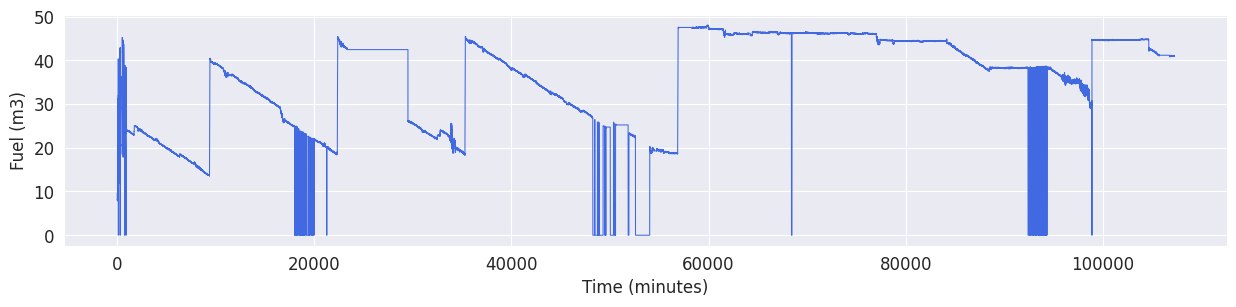

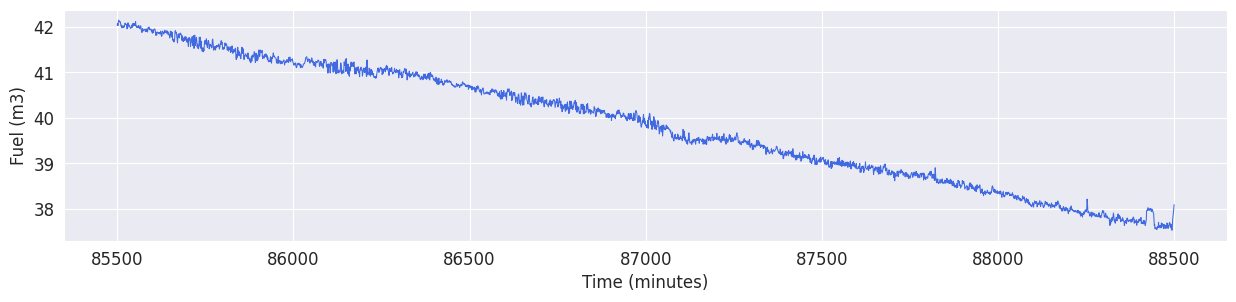

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 3))
engine_and_fuel_df["total_vol"].plot(color='royalblue', linewidth='0.75')

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Fuel (m3)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.set_style('darkgrid')
plt.figure(figsize=(15, 3))
initial_idx = 85500
final_idx = 88500
engine_and_fuel_df.loc[initial_idx:final_idx, "total_vol"].plot(color='royalblue', linewidth='0.75')

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Fuel (m3)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)

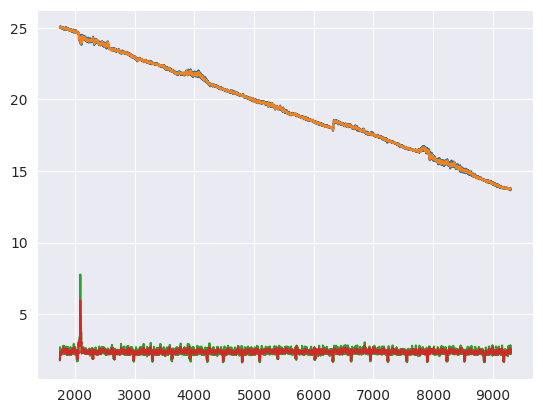

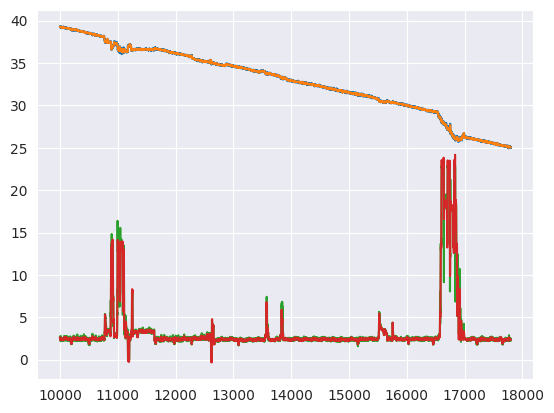

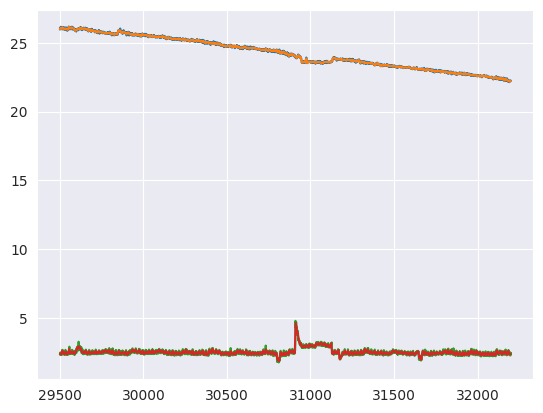

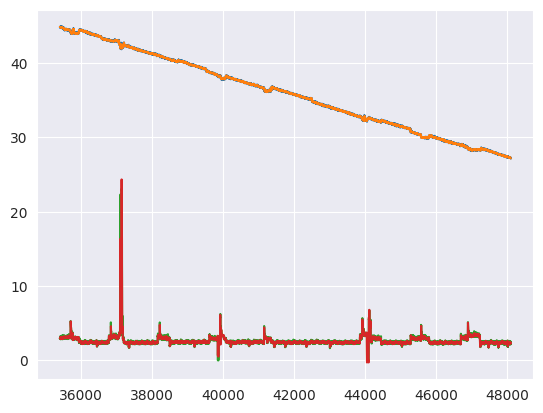

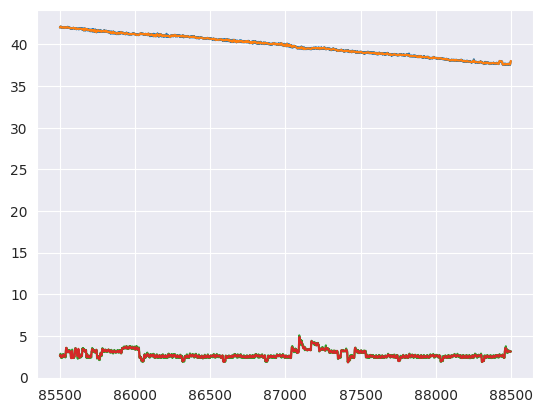

In [23]:
fuel_noise_start_points = [1750, 10000, 29500, 35400, 85500]
fuel_noise_end_points = [9300, 17800, 32200, 48100, 88500]

segments = []

for noise_start_point, noise_end_point in zip(fuel_noise_start_points, fuel_noise_end_points):
    plt.figure()
    segment = engine_and_fuel_df_all_columns.loc[noise_start_point:noise_end_point].copy()
    segment.reset_index(drop=True, inplace=True)
    segments.append(segment)
    engine_and_fuel_df_all_columns["total_vol"][noise_start_point:noise_end_point].plot()
    plt.plot(
        engine_and_fuel_df_all_columns["total_vol"][noise_start_point:noise_end_point].index,
        savgol_filter(engine_and_fuel_df_all_columns["total_vol"][noise_start_point:noise_end_point], 10, 2))

    (engine_and_fuel_df_all_columns["total_load"][noise_start_point:noise_end_point]/100).plot()
    plt.plot(
        engine_and_fuel_df_all_columns["total_vol"][noise_start_point:noise_end_point].index,
        savgol_filter(engine_and_fuel_df_all_columns["total_load"][noise_start_point:noise_end_point]/100, 10, 2))

In [24]:
segments[0].loc[:segments[0].shape[0]-2, "total_vol_diff"] = segments[0]["total_vol"].diff().values[1:]
segment = segments[0]
tmp = segment["total_vol"]
new_segment = []
min_value = tmp[0]
for i in range(1, len(tmp)):
    if tmp[i] < min_value:
        new_segment.append(tmp[i])
        min_value = tmp[i]
# segment.loc[segment["total_vol_diff"]<0, "total_vol"].plot()

In [26]:
monotonically_decreasing_segments = []
for segment in segments:
    tmp = segment[["total_vol", "total_load"]]
    new_segment = pd.DataFrame(columns=["total_vol", "total_load"])
    min_value = tmp.loc[0, "total_vol"]
    for idx, row in tmp.iterrows():
        if row["total_vol"] < min_value:
            new_segment.loc[idx] = row
            min_value = row["total_vol"]
    new_segment.reset_index(drop=True, inplace=True)
    new_segment.loc[:new_segment.shape[0]-2, "total_vol_diff"] = new_segment["total_vol"].diff().values[1:]
    monotonically_decreasing_segments.append(new_segment)
# segment.loc[segment["total_vol_diff"]<0, "total_vol"].plot()

In [71]:
segment_columns = ['aIEngineLoadPercent_y','aIEngineLoad_y','aIAirTemperatureTCInlet_y','aIGRUEnclosurePressure_x','aIGasTemperature_y','aIPilotFOTemperatureEngineInlet_x','aIChargeAirPressureEngineInlet_y','aIGRUEnclosurePressure_y','aIGasPressureEngineInlet_y','aIPilotFOPressureEngineOutlet_y','aIKnockKnockIntensityCylinderA02_x','aIKnockKnockIntensityCylinderA01_y','total_load','aIPmaxCylinderA04_y','aIPilotFOPressureEngineOutlet_x','aIRUNHoursGAS_y','aIWasteGateValvePositionCommand_y','aIChargeAirSetpointBarMPa_y','aIKnockKnockIntensityCylinderA08_x', 'total_vol']


rolling_mean_segments = []
original_segments = []

for segment in segments:
    # Create a numerical index for grouping
    tmp = segment[segment_columns]
    tmp.loc[:tmp.shape[0]-2, "total_vol_diff"] = tmp["total_vol"].diff().values[1:]
    rolling_mean = tmp.rolling(100).mean()
    # tmp['Group'] = np.arange(len(tmp)) // 5

    # # Compute the average of each group
    # tmp_average = tmp.groupby('Group').mean()

    # Optionally, you can drop the 'Group' column from the new DataFrame if it's no longer needed
    rolling_mean.dropna(inplace=True)
    rolling_mean.reset_index(drop=True, inplace=True)
    rolling_mean_segments.append(rolling_mean)
    tmp.reset_index(drop=True, inplace=True)
    original_segments.append(tmp)

/tmp/ipykernel_15473/2331532320.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_15473/2331532320.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_15473/2331532320.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

In [72]:
import plotly.express as px

In [81]:
average_k_df = pd.concat(rolling_mean_segments)
average_k_df.reset_index(drop=True, inplace=True)
fig = px.line(x=average_k_df.index, y=average_k_df["total_vol"])
fig.show()

segment0 = rolling_mean_segments[0]
segment1 = rolling_mean_segments[1]
segment2 = rolling_mean_segments[2]
segment3 = rolling_mean_segments[3]
print(segment0["total_load"].mean(), segment0["total_vol_diff"].mean())
print(segment1["total_load"].mean(), segment1["total_vol_diff"].mean())
print(segment2["total_load"].mean(), segment2["total_vol_diff"].mean())
print(segment3["total_load"].mean(), segment3["total_vol_diff"].mean())

# average_k_df["total_vol"].plot()

235.08423479798665 -0.00150584954427969
330.7029061965531 -0.0017216418892251019
249.60181853133412 -0.0014138792772010764
262.4519822414207 -0.0013708143348532115


In [80]:
segment0 = original_segments[0]
segment1 = original_segments[1]
segment2 = original_segments[2]
segment3 = original_segments[3]
print(segment0["total_load"].mean(), segment0["total_vol_diff"].mean())
print(segment1["total_load"].mean(), segment1["total_vol_diff"].mean())
print(segment2["total_load"].mean(), segment2["total_vol_diff"].mean())
print(segment3["total_load"].mean(), segment3["total_vol_diff"].mean())

235.15203284333202 -0.0014933774834437086
333.5076923076923 -0.001828846153846154
249.36764161421695 -0.0013962962962962974
263.109282733643 -0.0013913385826771652


In [83]:
corr = average_k_df.corr()
corr[["total_vol", "total_load", "total_vol_diff"]].head(30)

total_vol  total_load  total_vol_diff
aIEngineLoadPercent_y                0.420983    0.579621       -0.191571
aIEngineLoad_y                       0.420807    0.580110       -0.191748
aIAirTemperatureTCInlet_y            0.269150    0.041230        0.091854
aIGRUEnclosurePressure_x            -0.334020   -0.157909       -0.050677
aIGasTemperature_y                   0.142943   -0.026731        0.235762
aIPilotFOTemperatureEngineInlet_x    0.277616   -0.016132        0.069097
aIChargeAirPressureEngineInlet_y     0.354636    0.691228       -0.249289
aIGRUEnclosurePressure_y            -0.320761   -0.158834       -0.048000
aIGasPressureEngineInlet_y           0.351537    0.622177       -0.135413
aIPilotFOPressureEngineOutlet_y     -0.372491   -0.205252        0.019353
aIKnockKnockIntensityCylinderA02_x   0.009825    0.612837       -0.227633
aIKnockKnockIntensityCylinderA01_y  -0.009063    0.873513       -0.316257
total_load                           0.061010    1.000000       -0.365006
aIPmaxCylinderA04_y                  0.482602    0.277908       -0.085864
aIPilotFOPressureEngineOutlet_x     -0.398063   -0.222025        0.007227
aIRUNHoursGAS_y                      0.571205   -0.053424        0.061982
aIWasteGateValvePositionCommand_y   -0.486355   -0.110120        0.027642
aIChargeAirSetpointBarMPa_y          0.425955    0.438489       -0.174831
aIKnockKnockIntensityCylinderA08_x   0.011819    0.668572       -0.247256
total_vol                            1.000000    0.061010        0.017346
total_vol_diff                       0.017346   -0.365006        1.000000

In [35]:
average_k_df = pd.concat(average_k_points_segments)
average_k_df.reset_index(drop=True, inplace=True)
tmp = average_k_df.rolling(100).mean()
fig = px.line(x=tmp.index, y=tmp["total_vol"])
fig.show()

# average_k_df["total_vol"].plot()

In [148]:
new_segments = pd.concat(monotonically_decreasing_segments)
new_segments.reset_index(inplace=True, drop=True)
print(new_segments[new_segments["total_vol_diff"]>-0.0001][:10])
# Making all the e-15 to 0
new_segments.drop(new_segments.loc[new_segments["total_vol_diff"]>-0.000001, "total_vol_diff"].index, inplace=True)
print(new_segments[new_segments["total_vol_diff"]>-0.0001][:10])
new_segments.dropna(inplace=True)

    Unnamed: 0_x                  time aIAirTemperatureTCInlet_x  \
67         18786  2023-06-02T12:44:00Z                      33.2   
120        19461  2023-06-02T23:59:00Z                      32.7   
270        21696  2023-06-04T13:14:00Z                      33.6   
319        22710  2023-06-05T06:08:00Z                      35.0   
338        22923  2023-06-05T09:48:00Z                      35.3   
384        23514  2023-06-05T19:39:00Z                      31.2   
445        24637  2023-06-06T14:22:00Z                      31.2   
475        24982  2023-06-06T20:07:00Z                      29.8   
513        26192  2023-06-07T16:17:00Z                      35.7   
541        26536  2023-06-07T22:01:00Z                      34.6   

    aIBaseDurationGasAdmission_x aIChargeAirPressureEngineInlet_x  \
67                           0.0                             1.42   
120                          0.0                             1.44   
270                          0.0            

In [453]:
new_segments.loc[new_segments["total_vol_diff"] < -.1][["total_vol_diff", "total_load"]].head()

total_vol_diff  total_load
25           -0.400       276.0
352          -0.125       217.0
402          -0.225       270.0
412          -0.105       230.0
417          -0.170       246.0

In [472]:
new_segments.loc[new_segments["total_load"] > 1000][["total_vol", "total_vol_diff", "total_load", "time"]].head()

total_vol  total_vol_diff  total_load                  time
566     36.980          -0.135      1261.0  2023-06-08T01:36:00Z
568     36.825          -0.260      1231.0  2023-06-08T01:38:00Z
569     36.565          -0.040      1191.0  2023-06-08T01:41:00Z
570     36.525          -0.005      1185.0  2023-06-08T01:42:00Z
573     36.470          -0.065      1261.0  2023-06-08T03:35:00Z

In [158]:
for column in new_segments:
    try:
        new_segments[column] = pd.to_numeric(new_segments[column])
    except:
        pass

In [357]:
for column in new_segments.columns:
    print(column)

Unnamed: 0_x
time
aIAirTemperatureTCInlet_x
aIBaseDurationGasAdmission_x
aIChargeAirPressureEngineInlet_x
aIChargeAirSetpointBarMPa_x
aIChargeAirTemperatureEngineInlet_x
aICounterStarts_x
aICounterStartsX10000_x
aICrankcasePressure_x
aICyclicSlowTurningResult_x
aICyclicSlowTurningState_x
aIDVTControlAirPressure_x
aIDurationOffsetGasAdmissionCylinderA01_x
aIDurationOffsetGasAdmissionCylinderA02_x
aIDurationOffsetGasAdmissionCylinderA03_x
aIDurationOffsetGasAdmissionCylinderA04_x
aIDurationOffsetGasAdmissionCylinderA05_x
aIDurationOffsetGasAdmissionCylinderA06_x
aIDurationOffsetGasAdmissionCylinderA07_x
aIDurationOffsetGasAdmissionCylinderA08_x
aIDurationOffsetGasAdmissionCylinderA09_x
aIDurationOffsetPilotInjectionCylinderA01_x
aIDurationOffsetPilotInjectionCylinderA02_x
aIDurationOffsetPilotInjectionCylinderA03_x
aIDurationOffsetPilotInjectionCylinderA04_x
aIDurationOffsetPilotInjectionCylinderA05_x
aIDurationOffsetPilotInjectionCylinderA06_x
aIDurationOffsetPilotInjectionCylinderA07_x

In [159]:
numeric_columns = new_segments.select_dtypes(include=['number'])

Unnamed: 0_x  aIAirTemperatureTCInlet_x  aIBaseDurationGasAdmission_x  \
0            17636                       31.1                           0.0   
1            17644                       31.1                           0.0   
2            17652                       30.9                           0.0   
3            17671                       31.0                           0.0   
4            17678                       31.0                           0.0   
...            ...                        ...                           ...   
1896          7077                       37.8                           0.0   
1897          7078                       37.8                           0.0   
1898          7204                       37.9                           0.0   
1899          7206                       38.1                           0.0   
1900          7211                       38.0                           0.0   

      aIChargeAirPressureEngineInlet_x  aIChargeAirSetpointBarMPa_x  \
0                                 1.43                         1.89   
1                                 1.39                         1.86   
2                                 1.40                         1.87   
3                                 1.49                         1.94   
4                                 1.49                         1.95   
...                                ...                          ...   
1896                              1.34                         1.83   
1897                              1.35                         1.83   
1898                              1.45                         1.93   
1899                              1.46                         1.93   
1900                              1.41                         1.89   

      aIChargeAirTemperatureEngineInlet_x  aICounterStarts_x  \
0                                    43.2              762.0   
1                                    43.2              762.0   
2                                    42.7              762.0   
3                                    42.8              762.0   
4                                    43.2              762.0   
...                                   ...                ...   
1896                                 42.4              801.0   
1897                                 42.5              801.0   
1898                                 42.8              801.0   
1899                                 42.9              801.0   
1900                                 43.0              801.0   

      aICounterStartsX10000_x  aICrankcasePressure_x  \
0                         0.0                    1.2   
1                         0.0                    1.1   
2                         0.0                    1.2   
3                         0.0                    1.1   
4                         0.0                    1.2   
...                       ...                    ...   
1896                      0.0                   -0.1   
1897                      0.0                   -0.2   
1898                      0.0                   -0.5   
1899                      0.0                   -0.4   
1900                      0.0                   -0.2   

      aICyclicSlowTurningResult_x  ...  \
0                             0.0  ...   
1                             0.0  ...   
2                             0.0  ...   
3                             0.0  ...   
4                             0.0  ...   
...                           ...  ...   
1896                          0.0  ...   
1897                          0.0  ...   
1898                          0.0  ...   
1899                          0.0  ...   
1900                          0.0  ...   

      aITimingOffsetPilotInjectionCylinderA06_y  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4 

In [369]:
bool_data = new_segments.select_dtypes("bool")
bool_data = bool_data.astype(int)
bool_data["total_vol_diff"] = numeric_columns["total_vol_diff"]
bool_data.columns[:-1]

Index(['dI24VDCEarthFaultACPAlarm_x', 'dI24VDCEarthFaultMCPAlarm_x',
       'dIACPS4DIEmergencyStopACPWireBreakAlarm_x',
       'dIACPTemperatureFailureAlarm_x', 'dIACPTemperatureHighAlarm_x',
       'dIAIGasFlowAlarm_x',
       'dIAIGasSupplyPressureFilterOutletSensorFailureAlarm_x',
       'dIAirBypassValveDriverFailureAlarm_x',
       'dIAnyCircuitBreakerOffACPAlarm_x', 'dIAnyCircuitBreakerOffMCPAlarm_x',
       ...
       'dITCInletLOPressSensorFailureAlarm_y', 'dITCSpeedHighAAlarm_y',
       'dITCSpeedSensorFailureAAlarm_y', 'dITestModeActiveEvent_y',
       'dITestModeActiveSB_y', 'dITurningGearEngagedSB_y', 'dIUPSAlarmAlarm_y',
       'dIWastegateDriverFailureAlarm_y',
       'dIWireBreakEmergencyStopFromRemote2Alarm_y',
       'dIYardMainGasValveClosedInGasOperationGasTrip_y'],
      dtype='object', length=1096)

In [372]:
import pandas as pd
import scipy.stats as stats

# Sample DataFrame (replace with your DataFrame)
# df = pd.read_csv('your_data.csv')

# Function to perform ANOVA and return the p-value
def calculate_anova(df, column, dependent_variable):
    groups = [group.dropna() for name, group in df.groupby(column)[dependent_variable]]
    if len(groups) < 2 or any(len(group) < 2 for group in groups):
        # Skip categories with less than two groups or any group with less than two observations
        return None
    f_val, p_val = stats.f_oneway(*groups)
    return p_val

# Replace with your continuous dependent variable column name
dependent_variable = 'total_vol_diff'

# Only considering categorical columns
categorical_columns = bool_data.columns[:-1]

# Calculating p-values for each categorical variable
p_values = {column: calculate_anova(bool_data, column, dependent_variable) for column in categorical_columns}

# Sorting variables based on p-value
sorted_variables = sorted({k: v for k, v in p_values.items() if v is not None}.items(), key=lambda x: x[1])

# Displaying the most related variables
print("Categorical variables most related to the continuous dependent variable (sorted):")
for var, p in sorted_variables:
    print(f"{var}: p-value = {p}")


Categorical variables most related to the continuous dependent variable (sorted):
dILOLevelHighAlarm_y: p-value = 4.338922017315706e-05
dIReadyToStartEvent_y: p-value = 5.093491559228596e-05
dIEngineStoppedEvent_y: p-value = 0.00011101130178587178
dIEngineIsRunningEvent_y: p-value = 0.00016265258563314183
dIDegassingValveACLOSEDPositionFeedbackEvent_y: p-value = 0.00021710716764643126
dIGeneratorCBIsClosedEvent_y: p-value = 0.000273916729093585
dIEnableActuatorEvent_y: p-value = 0.00028815591270465226
dITCInletLOPressLowRunAlarm_x: p-value = 0.0021067353707384506
dIPilotInjectionTestFailureCylA01GasTrip_y: p-value = 0.0036697312306767926
dIPilotInjectionTestFailureCylA02GasTrip_y: p-value = 0.0036697312306767926
dIPilotInjectionTestFailureCylA03GasTrip_y: p-value = 0.0036697312306767926
dIPilotInjectionTestFailureCylA04GasTrip_y: p-value = 0.0036697312306767926
dIPilotInjectionTestFailureCylA05GasTrip_y: p-value = 0.0036697312306767926
dIPilotInjectionTestFailureCylA06GasTrip_y: p-valu

In [401]:
final_data = numeric_columns.copy()
final_data["dIEngineStoppedEvent_y"] = bool_data["dIEngineStoppedEvent_y"]
final_data["dIEngineStoppedEvent_x"] = bool_data["dIEngineStoppedEvent_x"]

In [402]:
final_data0 = final_data[(final_data["dIEngineStoppedEvent_y"]==0) & (final_data["dIEngineStoppedEvent_x"]==0)]
final_data1 = final_data[(final_data["dIEngineStoppedEvent_y"]==0) & (final_data["dIEngineStoppedEvent_x"]==1)]
final_data2 = final_data[(final_data["dIEngineStoppedEvent_y"]==1) & (final_data["dIEngineStoppedEvent_x"]==0)]
final_data3 = final_data[(final_data["dIEngineStoppedEvent_y"]==1) & (final_data["dIEngineStoppedEvent_x"]==1)]

In [415]:
def compute_corr(df, k):
    corr = df.corr()
    print(corr["total_vol_diff"].sort_values()[:k])
    print(corr["total_vol_diff"].sort_values(ascending=False)[:k])

In [416]:
final_data0["total_vol_diff"].describe()

count    93.000000
mean     -0.061075
std       0.063716
min      -0.400000
25%      -0.080000
50%      -0.040000
75%      -0.020000
max      -0.005000
Name: total_vol_diff, dtype: float64

In [418]:
compute_corr(final_data0, 10)

aIKnockKnockIntensityCylinderA01_y    -0.255664
aIGasTemperature_x                    -0.245657
aIGRUControlAirPressure_x             -0.225234
aIGRUControlAirPressure_y             -0.225165
aIChargeAirTemperatureEngineInlet_x   -0.199424
aIKnockKnockIntensityCylinderA02_x    -0.199069
aIKnockKnockIntensityCylinderA09_x    -0.188758
aIKnockKnockIntensityCylinderA08_x    -0.186704
aILTCWTemperatureAirCoolerOutlet_x    -0.166378
aIPmaxCylinderA02_y                   -0.164721
Name: total_vol_diff, dtype: float64
total_vol_diff                          1.000000
aILOTemperatureEngineInlet_y            0.186270
aIGasSupplyPressureRegulatorOutlet_x    0.181977
aIHTCWTemperatureJacketInlet_y          0.173149
aIRUNHoursGAS_x                         0.168840
aIThrustBearingTemperature1_y           0.162066
aIMainBearingTemperatureCylinder1_y     0.160956
aIInertGasPressure_x                    0.152752
aIMainBearingTemperatureCylinder5_y     0.147929
aIMainBearingTemperatureCylinder9_y     0.

In [420]:
print(final_data1["total_vol_diff"].describe())
compute_corr(final_data1, 5)

count    1006.000000
mean       -0.027709
std         0.026833
min        -0.295000
25%        -0.035000
50%        -0.020000
75%        -0.010000
max        -0.005000
Name: total_vol_diff, dtype: float64
aIPmaxCylinderA02_y     -0.131023
aIPmaxCylinderA06_y     -0.128045
aIEngineLoad_y          -0.127215
total_load              -0.127215
aIEngineLoadPercent_y   -0.127142
Name: total_vol_diff, dtype: float64
total_vol_diff               1.000000
aIPilotFuelCheckResult_y     0.077090
aIGasTemperature_y           0.076385
aIRUNHoursBACKUP_y           0.076108
aIGRUControlAirPressure_x    0.063569
Name: total_vol_diff, dtype: float64


In [422]:
print(final_data2["total_vol_diff"].describe())
compute_corr(final_data2, 5)

count    547.000000
mean      -0.024424
std        0.025204
min       -0.225000
25%       -0.030000
50%       -0.020000
75%       -0.010000
max       -0.005000
Name: total_vol_diff, dtype: float64
Unnamed: 0_y                           -0.074349
Unnamed: 0_x                           -0.074349
aIExhaustGasTemperatureCylinderA08_y   -0.069437
aIRUNHoursBACKUP_y                     -0.063206
aIGasSupplyPressureRegulatorOutlet_y   -0.062737
Name: total_vol_diff, dtype: float64
total_vol_diff                                 1.000000
aIWasteGateValvePositionCommand_y              0.119946
aIRemainingTimeForStartBlockDueToPT621Low_y    0.106009
aIRemainingTimeForStartBlockDueToPT622Low_y    0.105711
aICrankcasePressure_y                          0.105273
Name: total_vol_diff, dtype: float64


In [407]:
final_data3["total_vol_diff"].describe()

count    3.000000e+00
mean    -1.000000e-02
std      4.102320e-15
min     -1.000000e-02
25%     -1.000000e-02
50%     -1.000000e-02
75%     -1.000000e-02
max     -1.000000e-02
Name: total_vol_diff, dtype: float64

In [458]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
corr = numeric_columns.corr()
k = 10
topk_ascending_columns = corr["total_vol_diff"].sort_values()[:k].index
topk_descending_columns = corr["total_vol_diff"].sort_values(ascending=False)[:k].index
data_columns = list(topk_ascending_columns)
data_columns.append("total_vol_diff")
data_columns.extend(topk_descending_columns)
data_columns = list(set(data_columns)) # Get unique columns only
data = numeric_columns.loc[:, data_columns]
y = data["total_vol_diff"].copy()
X = data.drop("total_vol_diff", axis=1)
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

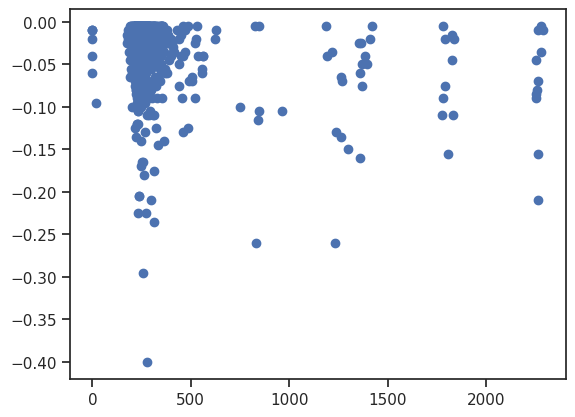

In [459]:
plt.scatter(data["total_load"], data["total_vol_diff"])

In [466]:
average_k_points_segments = []
segment_columns = data_columns[1:] # Without vol diff value
for segment in segments:
    # Create a numerical index for grouping
    tmp = segment[segment_columns]
    tmp['Group'] = np.arange(len(tmp)) // 5

    # Compute the average of each group
    tmp_average = tmp.groupby('Group').mean()

    # Optionally, you can drop the 'Group' column from the new DataFrame if it's no longer needed
    tmp_average.reset_index(drop=True, inplace=True)
    average_k_points_segments.append(tmp_average)

/tmp/ipykernel_6182/3281465988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Group'] = np.arange(len(tmp)) // 5
/tmp/ipykernel_6182/3281465988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Group'] = np.arange(len(tmp)) // 5
/tmp/ipykernel_6182/3281465988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [469]:
average_k_df = pd.concat(average_k_points_segments)
average_k_df.reset_index(drop=True, inplace=True)
average_k_df

aIEngineLoadPercent_y  aIEngineLoad_y  aIAirTemperatureTCInlet_y  \
0                       0.0             0.0                      31.56   
1                       0.0             0.0                      31.60   
2                       0.0             0.0                      31.66   
3                       0.0             0.0                      31.58   
4                       0.0             0.0                      31.62   
...                     ...             ...                        ...   
6750                    0.0             0.0                      37.18   
6751                    0.0             0.0                      37.24   
6752                    0.0             0.0                      37.22   
6753                    0.0             0.0                      37.22   
6754                    0.0             0.0                      37.20   

      aIGRUEnclosurePressure_x  aIGasTemperature_y  \
0                        -29.0               27.44   
1                        -29.0               27.52   
2                        -29.0               27.52   
3                        -29.0               27.60   
4                        -29.0               27.56   
...                        ...                 ...   
6750                     -30.0               31.50   
6751                     -30.0               31.50   
6752                     -30.0               31.50   
6753                     -30.0               31.50   
6754                     -30.0               31.50   

      aIPilotFOTemperatureEngineInlet_x  aIChargeAirPressureEngineInlet_y  \
0                                 29.00                             1.008   
1                                 28.94                             1.004   
2                                 28.78                             1.004   
3                                 28.86                             1.004   
4                                 28.94                             1.008   
...                                 ...                               ...   
6750                              31.76                             1.010   
6751                              31.78                             1.010   
6752                              31.80                             1.010   
6753                              31.76                             1.010   
6754                              31.80                             1.010   

      aIGRUEnclosurePressure_y  aIGasPressureEngineInlet_y  \
0                        -29.0                       0.040   
1                        -29.0                       0.042   
2                        -29.0                       0.040   
3                        -29.0                       0.040   
4                        -29.0                       0.040   
...                        ...                         ...   
6750                     -30.0                       0.042   
6751                     -30.0                       0.040   
6752                     -30.0                       0.040   
6753                     -30.0                       0.042   
6754                     -30.0                       0.040   

      aIPilotFOPressureEngineOutlet_y  aIKnockKnockIntensityCylinderA02_x  \
0                               1.312                                 0.0   
1                               1.312                                 0.0   
2                               1.312                                 0.0   
3                               1.310                                 0.0   
4                               1.310                                 0.0   
...                               ...                                 ...   
6750                            1.320                                 0.0   
6751                            1.312                                 0.0   
6752                            1.316                                 0.0   
6753                        

In [462]:
(np.arange(len(segments[0])) // 5).shape

(7551,)

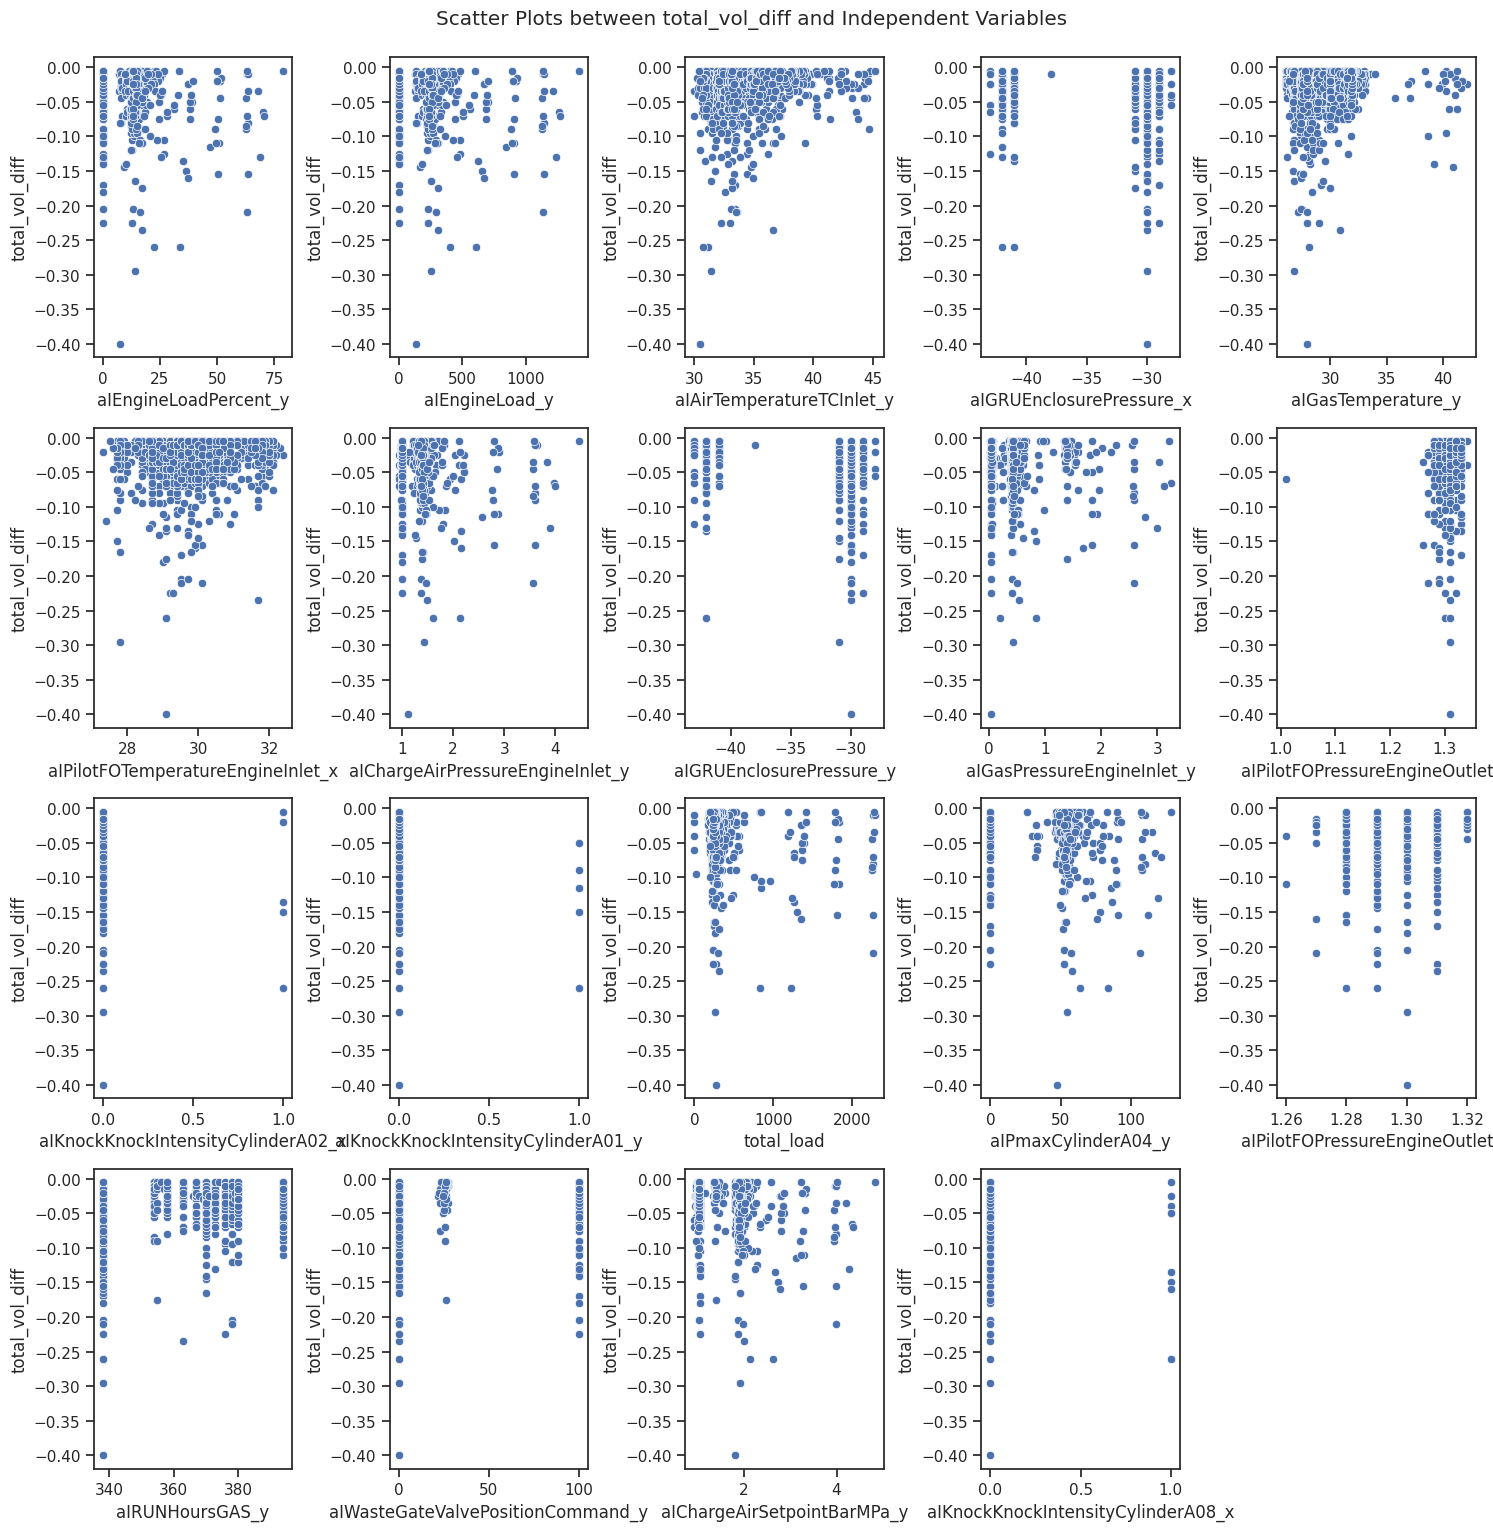

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dependent variable
dependent_var = 'total_vol_diff'

# Define a list of independent variables
independent_vars = list(data.columns[1:])

# Create a pairplot with scatter plots
# sns.set(style="ticks")
# sns.pairplot(data, x_vars=independent_vars, y_vars=[dependent_var], kind="scatter")


plt.figure(figsize=(15, 15))

# Creating a 4x5 grid of pairplots
for i in range(1, 21):
    plt.subplot(4, 5, i)
    if i <= 19:
        sns.scatterplot(x=independent_vars[i-1], y=dependent_var, data=data)
    else:
        plt.axis('off')

plt.tight_layout()

# Add titles to the scatter plots
plt.suptitle(f'Scatter Plots between {dependent_var} and Independent Variables', y=1.02)

plt.show()

# Show the plot
# plt.show()


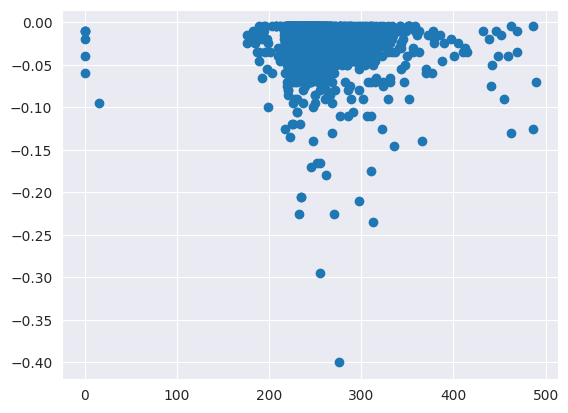

In [338]:
plt.scatter(data.loc[data["total_load"]<500, "total_load"], data.loc[data["total_load"]<500, "total_vol_diff"])

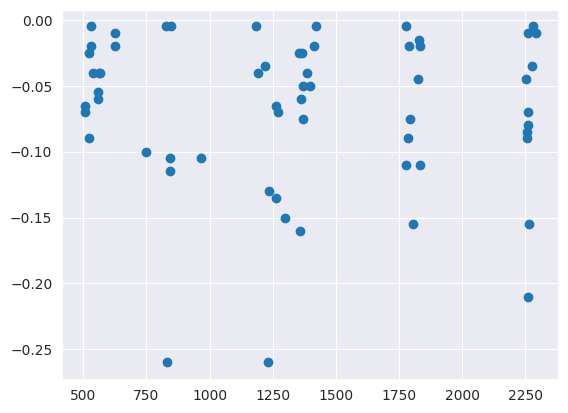

In [339]:
plt.scatter(data.loc[data["total_load"]>500, "total_load"], data.loc[data["total_load"]>500, "total_vol_diff"])

In [333]:
data["total_vol_diff"].describe()

count    1649.000000
mean       -0.028469
std         0.030701
min        -0.400000
25%        -0.035000
50%        -0.020000
75%        -0.010000
max        -0.005000
Name: total_vol_diff, dtype: float64

<Axes: >

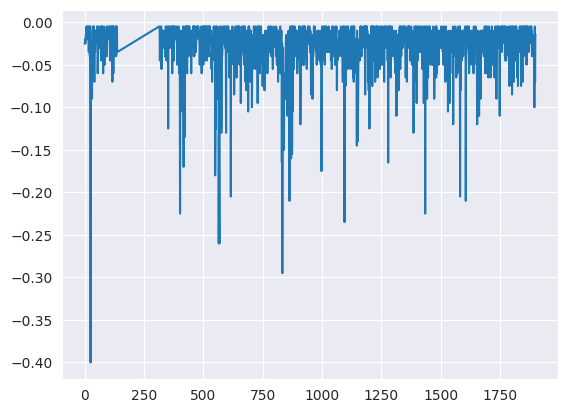

In [318]:
data["total_vol_diff"].plot()
# (data["aIGasTemperature_y"]/100).plot()

In [306]:
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
mean_absolute_error(pred, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 1484, number of used features: 1
[LightGBM] [Info] Start training from score -0.028406


0.01920261556220788

In [307]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 20)  # 20 outputs
        self.fc2 = nn.Linear(20, 20) # 20 inputs, 20 outputs
        self.fc3 = nn.Linear(20, 1)  # 10 inputs, 1 output (vol_diff)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Define the Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Example Data (you will replace this with your actual data)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Convert X to a PyTorch tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Convert y to a PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Convert X to a PyTorch tensor
inputs = X_train_tensor
targets = y_train_tensor

# Training the Network
for epoch in range(1000):  # number of times to loop over the dataset
    optimizer.zero_grad()   # zero the parameter gradients
    outputs = net(inputs)   # forward pass
    loss = criterion(outputs, targets) # calculate the loss
    loss.backward()         # backward pass
    optimizer.step()        # optimize

    if epoch % 10 == 0:    # print every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.item()}')

with torch.no_grad():
    test_input = X_test_tensor # Example voltage input
    predicted_soc = net(test_input)
    print(mean_absolute_error(y_test, predicted_soc))

/home/danielkim/Desktop/mna_lab/battery_AD/battery_env/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1484])) that is different to the input size (torch.Size([1484, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.10875643789768219
Epoch 10, Loss: 0.07700014114379883
Epoch 20, Loss: 0.04839280620217323
Epoch 30, Loss: 0.024113522842526436
Epoch 40, Loss: 0.008891682140529156
Epoch 50, Loss: 0.002261051908135414
Epoch 60, Loss: 0.0011358549818396568
Epoch 70, Loss: 0.0013346177292987704
Epoch 80, Loss: 0.0011581860017031431
Epoch 90, Loss: 0.0010346032213419676
Epoch 100, Loss: 0.0010205029975622892
Epoch 110, Loss: 0.0010075889294967055
Epoch 120, Loss: 0.0009927042992785573
Epoch 130, Loss: 0.0009845837485045195
Epoch 140, Loss: 0.0009789946489036083
Epoch 150, Loss: 0.0009748743614181876
Epoch 160, Loss: 0.0009723010589368641
Epoch 170, Loss: 0.0009707021526992321
Epoch 180, Loss: 0.000969738990534097
Epoch 190, Loss: 0.0009691991144791245
Epoch 200, Loss: 0.0009689069702289999
Epoch 210, Loss: 0.0009687515557743609
Epoch 220, Loss: 0.0009686717530712485
Epoch 230, Loss: 0.0009686321718618274
Epoch 240, Loss: 0.000968612206634134
Epoch 250, Loss: 0.0009686011471785605
Epoch 26

<Axes: >

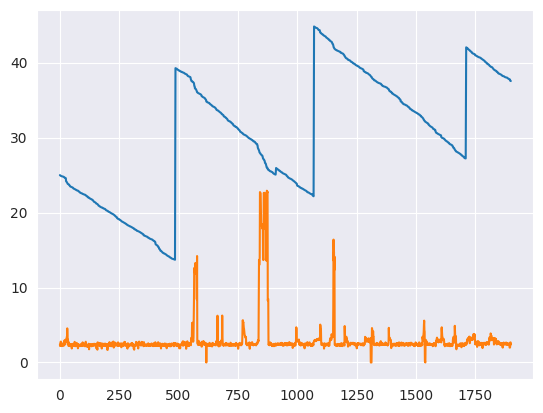

In [83]:
new_segments["total_vol"].plot()
(new_segments["total_load"]/100).plot()

In [79]:
new_segments.describe()

total_vol   total_load  total_vol_diff
count  1840.000000  1840.000000     1840.000000
mean     30.364755   295.758152       -0.028065
std       8.421930   251.427106        0.030026
min      13.700000     0.000000       -0.400000
25%      23.177500   230.000000       -0.035000
50%      31.327500   244.000000       -0.020000
75%      38.078750   262.000000       -0.010000
max      44.820000  2291.000000       -0.005000

In [82]:
new_segments.loc[(new_segments["total_load"]>230) & (new_segments["total_load"]<262)].corr()

total_vol  total_load  total_vol_diff
total_vol        1.000000   -0.018055       -0.027233
total_load      -0.018055    1.000000       -0.001730
total_vol_diff  -0.027233   -0.001730        1.000000

In [86]:
print(new_segments[new_segments["total_load"]<230].mean())
print(new_segments[(new_segments["total_load"]>230) & (new_segments["total_load"]<244)].mean())
print(new_segments[new_segments["total_load"]>262].mean())

total_vol          26.284454
total_load        215.650485
total_vol_diff     -0.023993
dtype: float64
total_vol          31.274217
total_load        238.105140
total_vol_diff     -0.025012
dtype: float64
total_vol          34.212932
total_load        486.531818
total_vol_diff     -0.037739
dtype: float64


total_vol  total_load  total_vol_diff
total_vol        1.000000   -0.156068       -0.040166
total_load      -0.156068    1.000000        0.061442
total_vol_diff  -0.040166    0.061442        1.000000

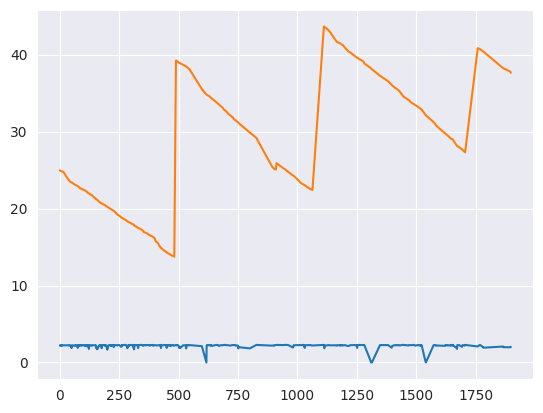

In [87]:
(new_segments.loc[new_segments["total_load"]<230, "total_load"]/100).plot()
new_segments.loc[new_segments["total_load"]<230, "total_vol"].plot()
new_segments.loc[new_segments["total_load"]<230].corr()

In [59]:
new_segments.corr()

total_vol  total_load  total_vol_diff
total_vol        1.000000    0.047686       -0.062112
total_load       0.047686    1.000000       -0.264753
total_vol_diff  -0.062112   -0.264753        1.000000

In [88]:
# Sort the DataFrame based on the column you want to bin
df_sorted = new_segments.sort_values(by='total_load')

# Calculate the number of rows in each bin
num_rows = len(df_sorted)
bin_size = num_rows // 5

# Initialize an empty list to store the 10 DataFrames
split_dataframes = []

# Split the sorted DataFrame into 10 equal parts and store them in the list
for i in range(0, num_rows, bin_size):
    split_dataframes.append(df_sorted.iloc[i:i+bin_size])
    print(df_sorted.iloc[i:i+bin_size].corr())

                total_vol  total_load  total_vol_diff
total_vol        1.000000   -0.161451       -0.032115
total_load      -0.161451    1.000000        0.056926
total_vol_diff  -0.032115    0.056926        1.000000
                total_vol  total_load  total_vol_diff
total_vol        1.000000    0.278562       -0.065599
total_load       0.278562    1.000000       -0.026062
total_vol_diff  -0.065599   -0.026062        1.000000
                total_vol  total_load  total_vol_diff
total_vol        1.000000   -0.061612       -0.005830
total_load      -0.061612    1.000000       -0.077883
total_vol_diff  -0.005830   -0.077883        1.000000
                total_vol  total_load  total_vol_diff
total_vol        1.000000    0.145299        0.000911
total_load       0.145299    1.000000       -0.094984
total_vol_diff   0.000911   -0.094984        1.000000
                total_vol  total_load  total_vol_diff
total_vol        1.000000    -0.31157        0.116896
total_load      -0.311570   

total_vol  total_load  total_vol_diff
total_vol        1.000000   -0.044418       -0.043466
total_load      -0.044418    1.000000        0.088213
total_vol_diff  -0.043466    0.088213        1.000000

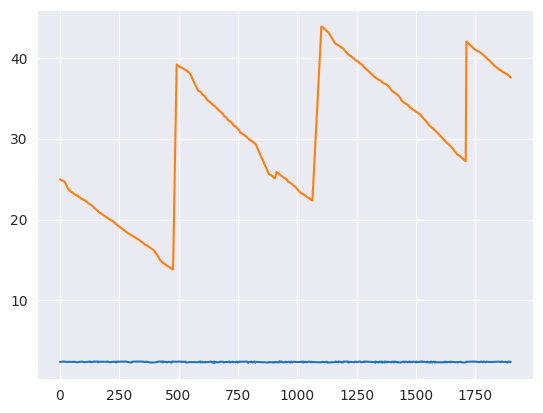

In [102]:
(new_segments.loc[(new_segments["total_load"]>230) & (new_segments["total_load"]<244), "total_load"]/100).plot()
(new_segments.loc[(new_segments["total_load"]>230) & (new_segments["total_load"]<244), "total_vol"]).plot()
new_segments.loc[(new_segments["total_load"]>230) & (new_segments["total_load"]<244)].corr()

total_vol  total_load  total_vol_diff
total_vol        1.000000   -0.130755        0.025593
total_load      -0.130755    1.000000       -0.280033
total_vol_diff   0.025593   -0.280033        1.000000

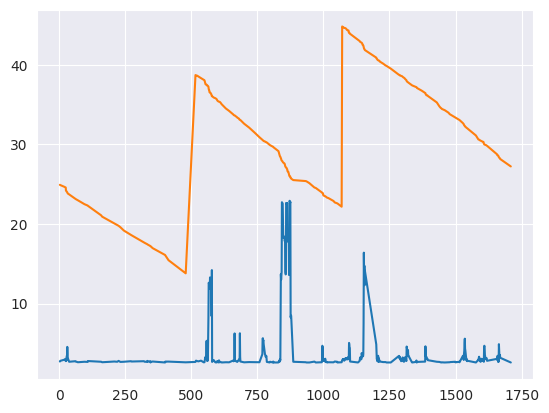

In [50]:
(new_segments.loc[new_segments["total_load"]>257, "total_load"]/100).plot()
new_segments.loc[new_segments["total_load"]>257, "total_vol"].plot()
new_segments.loc[new_segments["total_load"]>257].corr()

In [305]:
fuel_noise_start_points = [1750, 10000, 29500, 35400]
fuel_noise_end_points = [9300, 17800, 32200, 48100]

fuel_noise_dataset = []

for noise_start_point, noise_end_point in zip(fuel_noise_start_points, fuel_noise_end_points):
    data = engine_and_fuel_df[noise_start_point:noise_end_point][["total_load", "total_vol"]]
    data["filtered_vol"] = savgol_filter(data["total_vol"], noise_end_point-noise_start_point, 2)
    data["filtered_load"] = savgol_filter(data["total_load"], 10, 2)

    fuel_noise_dataset.append(data)

fuel_noise_df = pd.concat(fuel_noise_dataset)
fuel_noise_df.reset_index(drop=True, inplace=True)

<Axes: >

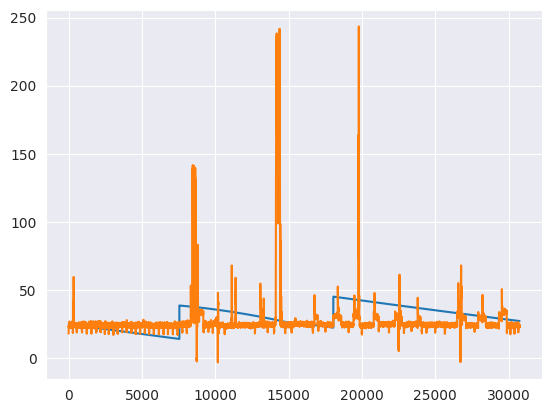

In [306]:
fuel_noise_df["filtered_vol"].plot()
(fuel_noise_df["filtered_load"]/10).plot()

In [294]:
fuel_noise_df

total_load  total_vol
1750        178.0     25.000
1751        190.0     25.055
1752        198.0     25.050
1753        270.0     25.055
1754        237.0     25.085
...           ...        ...
48095       230.0     27.260
48096       237.0     27.230
48097       223.0     27.220
48098       225.0     27.220
48099       234.0     27.150

[30750 rows x 2 columns]

## Analyze constant linear fuel consumption rate 

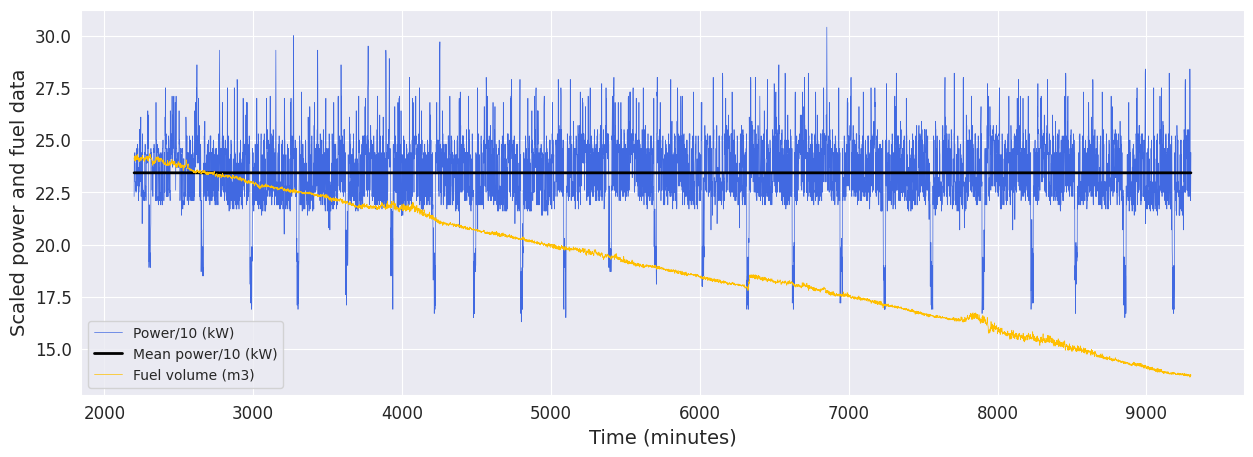

In [38]:
noise_start_point = 2200
noise_end_point = 9300
fuel_data = engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point]
load_data = engine_and_fuel_df["total_load"][noise_start_point:noise_end_point]

sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))


(load_data/10).plot(color='royalblue', linewidth=0.5)

plt.plot(load_data.index, np.ones(load_data.shape)*load_data.mean()/10, color='black', linewidth=2)

(fuel_data).plot(color='#FFBF00', linewidth=0.5)

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Scaled power and fuel data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Power/10 (kW)", "Mean power/10 (kW)", "Fuel volume (m3)"])

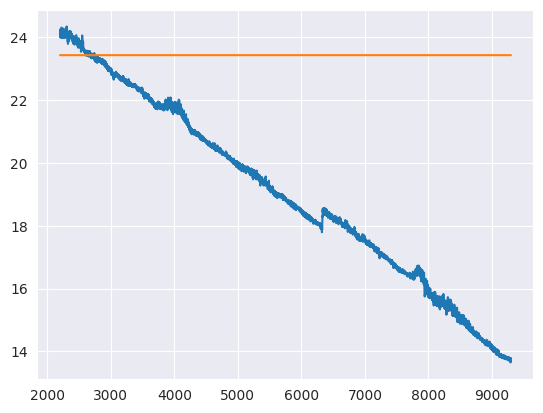

In [330]:
noise_start_point = 2200
noise_end_point = 9300
fuel_data = engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point]
load_data = engine_and_fuel_df["total_load"][noise_start_point:noise_end_point]
(fuel_data).plot()
plt.plot(load_data.index, np.ones(load_data.shape)*load_data.mean()/10)

## Proofs

In [331]:
engine_and_fuel_df[noise_start_point:noise_end_point][["total_load", "total_vol"]]

total_load  total_vol
2200       223.0     24.140
2201       241.0     24.085
2202       243.0     24.160
2203       241.0     24.230
2204       241.0     24.110
...          ...        ...
9295       243.0     13.690
9296       244.0     13.785
9297       221.0     13.775
9298       232.0     13.780
9299       244.0     13.730

[7100 rows x 2 columns]

<Axes: >

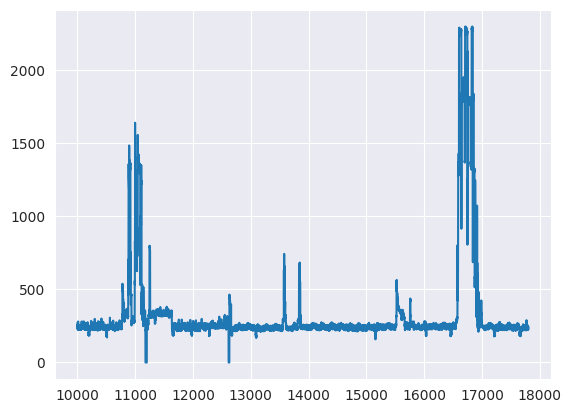

In [ ]:
noise_start_point = fuel_noise_start_points[1]
noise_end_point = fuel_noise_end_points[1]
engine_and_fuel_df["total_load"][noise_start_point:noise_end_point].plot()

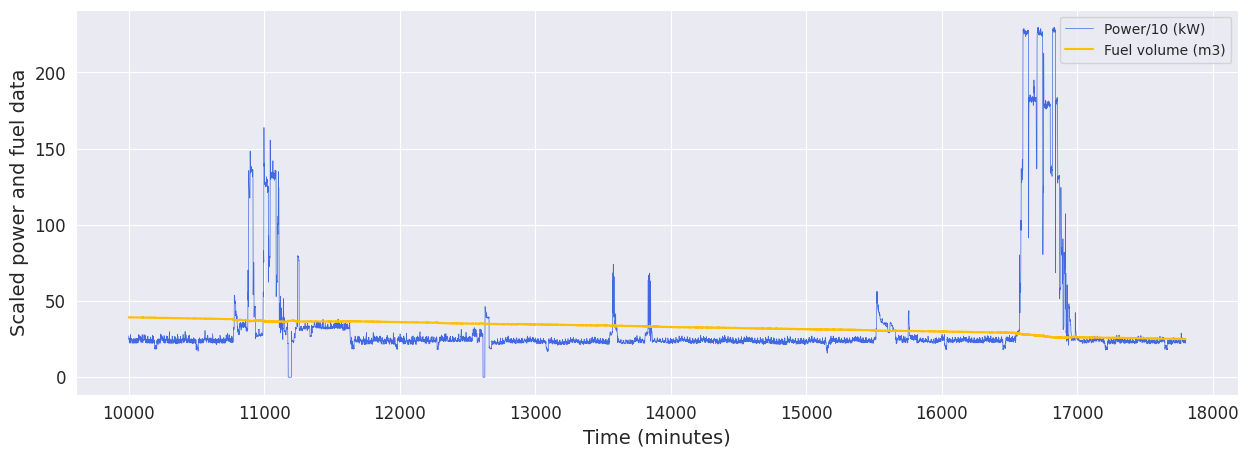

In [37]:
fuel_noise_start_points = [1750, 10000, 29500, 35400]
fuel_noise_end_points = [9300, 17800, 32200, 48100]

engine_noise_start_points = [1755, ]
engine_noise_end_points = [2000, ]
engine_noise_start_point = 10000
engine_noise_end_point = 17800
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
(engine_and_fuel_df["total_load"].loc[engine_noise_start_point:engine_noise_end_point]/10).plot(color='royalblue', linewidth=0.5)
engine_and_fuel_df["total_vol"].loc[engine_noise_start_point:engine_noise_end_point].plot(color='#FFBF00')

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Scaled power and fuel data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Power/10 (kW)", "Fuel volume (m3)"])

In [263]:
tmp = engine_and_fuel_df.loc[engine_noise_start_point:engine_noise_end_point]
tmp["scaled_load"] = tmp["total_load"] / 1000
tmp["diff_load"] = tmp["scaled_load"].diff()
tmp["diff_vol"] = tmp["total_vol"].diff()
tmp.set_index("time").corr()

/tmp/ipykernel_113746/1575319183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["scaled_load"] = tmp["total_load"] / 1000
/tmp/ipykernel_113746/1575319183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["diff_load"] = tmp["scaled_load"].diff()
/tmp/ipykernel_113746/1575319183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

aIEngineLoad_x  battery_only  aIEngineLoad_y  total_load  \
aIEngineLoad_x        1.000000           NaN        0.197245    0.745944   
battery_only               NaN           NaN             NaN         NaN   
aIEngineLoad_y        0.197245           NaN        1.000000    0.800058   
total_load            0.745944           NaN        0.800058    1.000000   
total_vol             0.111274           NaN       -0.387217   -0.194957   
scaled_load           0.745944           NaN        0.800058    1.000000   
diff_load             0.053708           NaN        0.066590    0.078101   
diff_vol             -0.018474           NaN       -0.018775   -0.024070   

                total_vol  scaled_load  diff_load  diff_vol  
aIEngineLoad_x   0.111274     0.745944   0.053708 -0.018474  
battery_only          NaN          NaN        NaN       NaN  
aIEngineLoad_y  -0.387217     0.800058   0.066590 -0.018775  
total_load      -0.194957     1.000000   0.078101 -0.024070  
total_vol        1.000000    -0.194957   0.003654  0.013498  
scaled_load     -0.194957     1.000000   0.078101 -0.024070  
diff_load        0.003654     0.078101   1.000000  0.005419  
diff_vol         0.013498    -0.024070   0.005419  1.000000

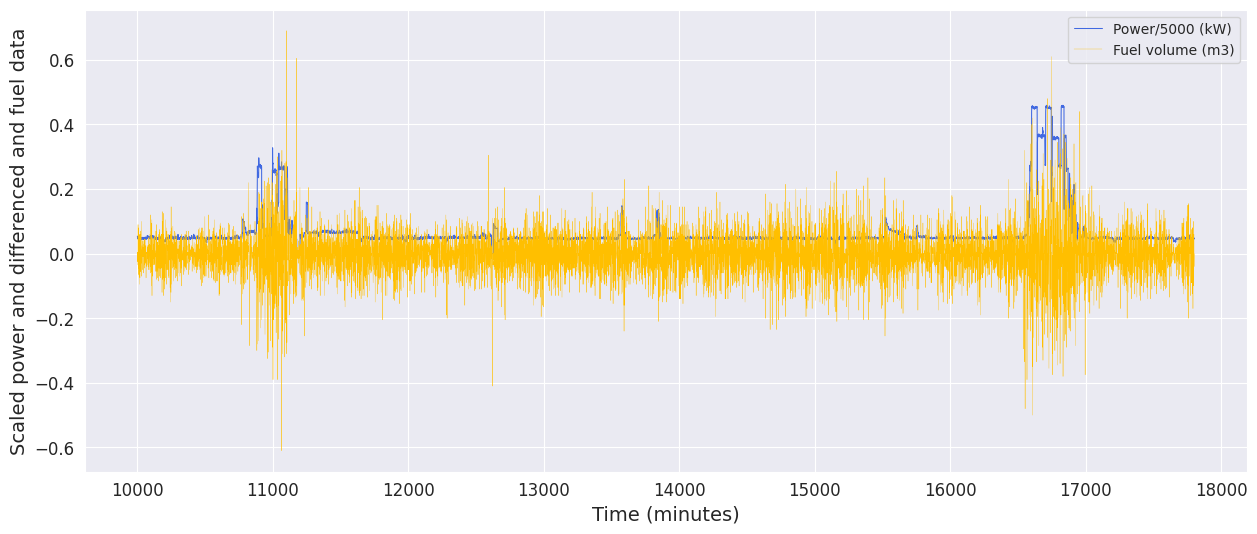

In [48]:
# Proof that the fuel consumption increases with the engine power

sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))

(engine_and_fuel_df["total_load"].loc[engine_noise_start_point:engine_noise_end_point]/5000).plot(color='royalblue', linewidth=0.75)
engine_and_fuel_df["total_vol"].loc[engine_noise_start_point:engine_noise_end_point].diff().plot(color='#FFBF00', linewidth=0.25)

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Scaled power and differenced and fuel data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Power/5000 (kW)", "Fuel volume (m3)"])

In [232]:
engine_and_fuel_df.describe()

aIEngineLoad_x   battery_only  aIEngineLoad_y     total_load  \
count   107222.000000  107225.000000   107225.000000  107222.000000   
mean        94.161469       0.000028      110.509909     204.671942   
std        188.500050       0.005289      180.421204     296.343959   
min          0.000000       0.000000        0.000000       0.000000   
25%          0.000000       0.000000        0.000000       0.000000   
50%          0.000000       0.000000        0.000000     230.000000   
75%        223.000000       0.000000      239.000000     253.000000   
max       1580.000000       1.000000     1656.000000    2719.000000   

           total_vol  
count  107225.000000  
mean       34.632009  
std        12.239203  
min         0.000000  
25%        25.220000  
50%        38.335000  
75%        44.560000  
max        48.025000

In [173]:
# Identify valid indices where fuel level is non-zero
tmp = engine_and_fuel_df.copy()
valid_indices = tmp[tmp["total_vol"] > 10].index
valid_fuel_levels = tmp.loc[valid_indices, "total_vol"]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels = f(valid_indices)

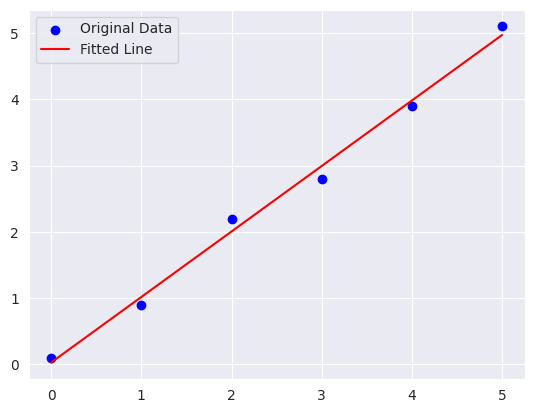

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example data with noise
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.1, 0.9, 2.2, 2.8, 3.9, 5.1])  # y = x + noise

# Reshape for sklearn
x_reshaped = x.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(x_reshaped, y)

# Predict values
x_new = np.linspace(x.min(), x.max(), 100)
y_pred = model.predict(x_new.reshape(-1, 1))

# Plotting
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_new, y_pred, color='red', label='Fitted Line')
plt.legend()
plt.show()


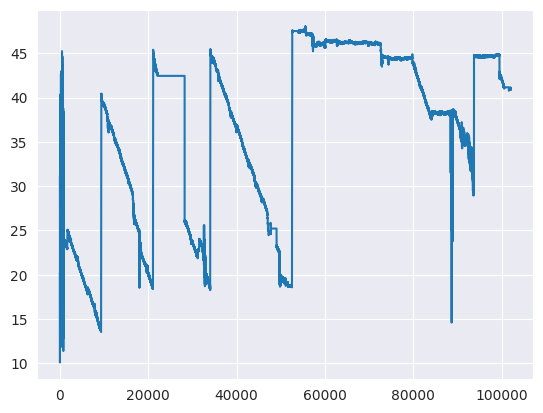

In [174]:
plt.plot(interpolated_fuel_levels)

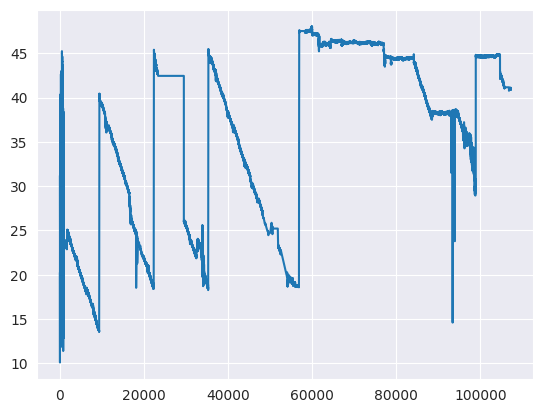

In [175]:
plt.plot(tmp.loc[valid_indices, "total_vol"])

<Axes: >

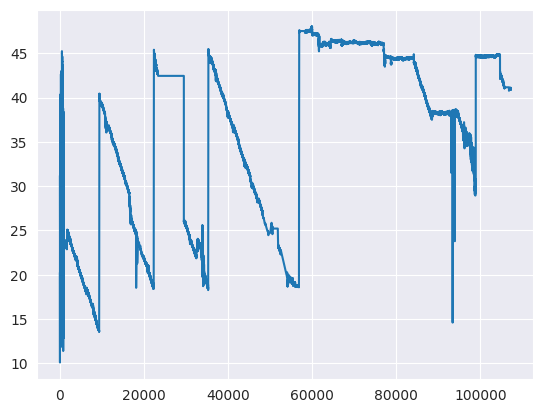

In [114]:
unnoisy_index = engine_and_fuel_df["total_vol"]>10
unnoisy_data = engine_and_fuel_df[unnoisy_index]
unnoisy_data["total_vol"].plot()

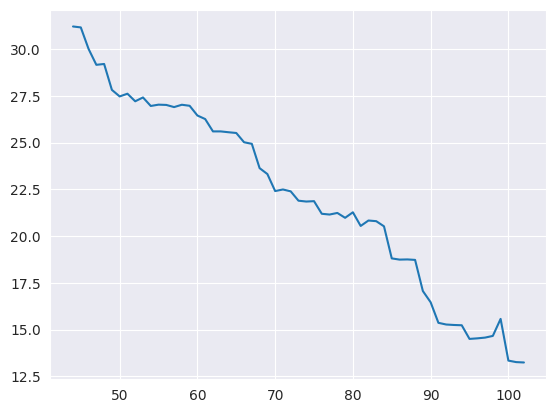

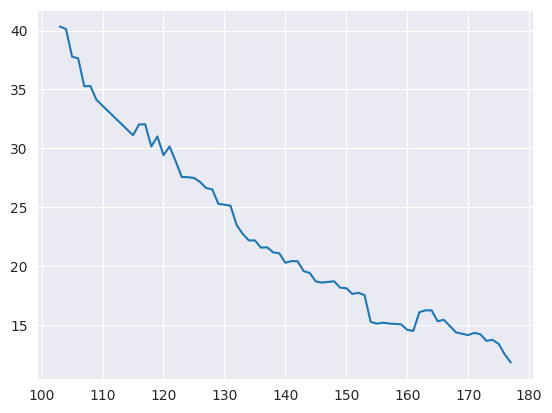

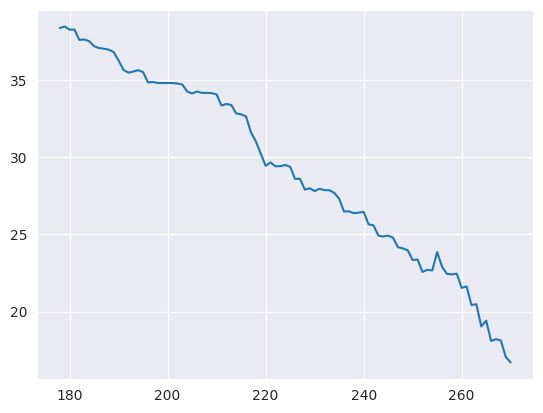

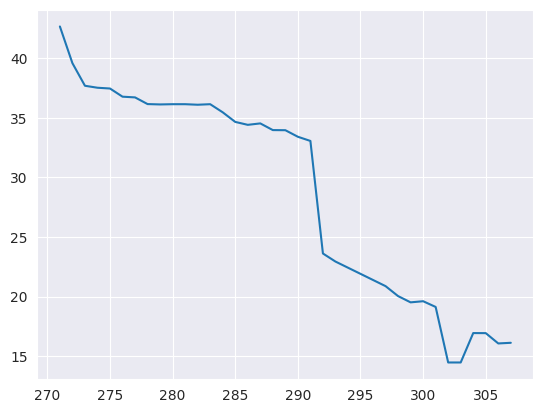

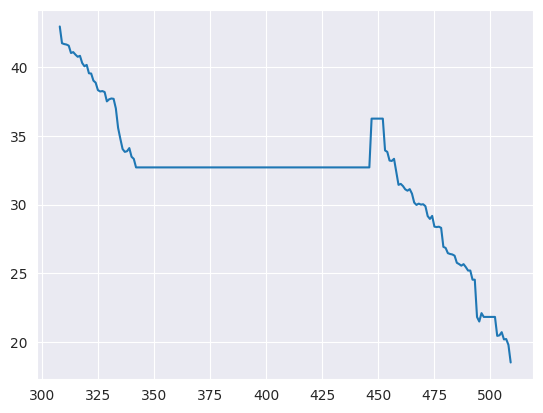

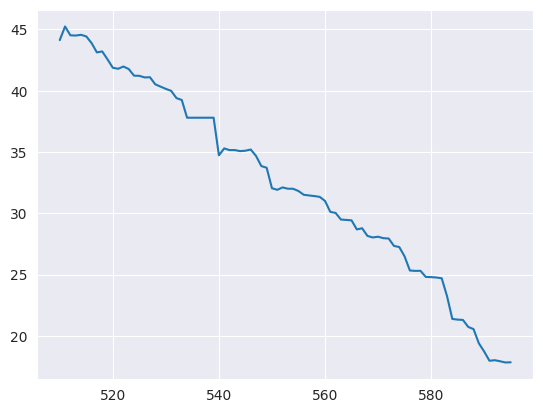

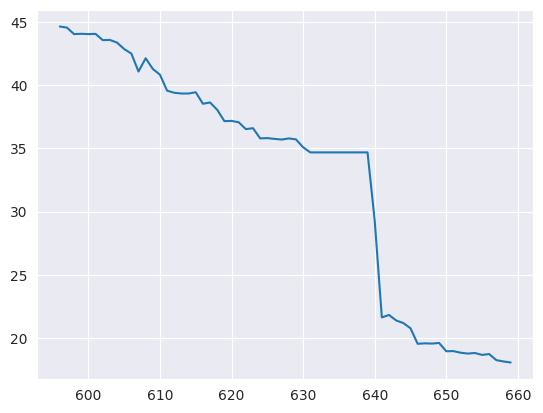

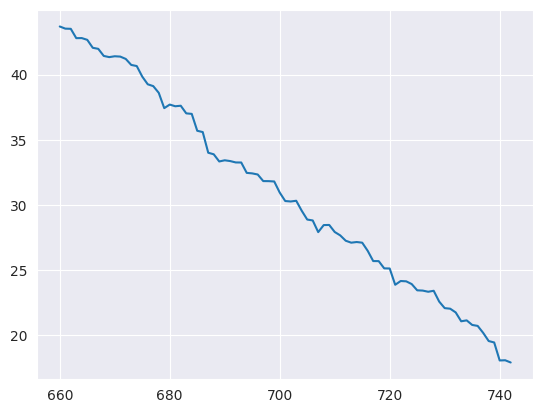

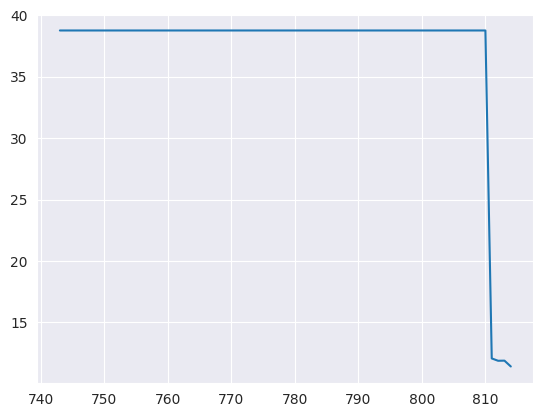

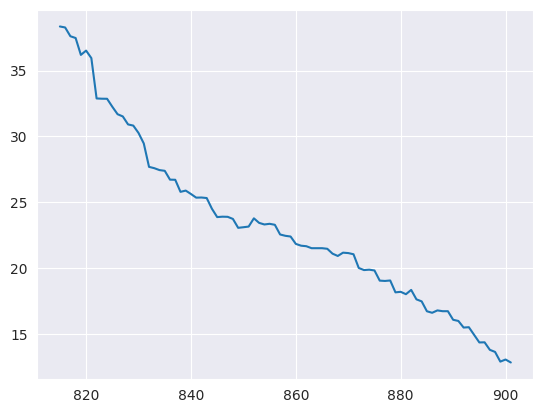

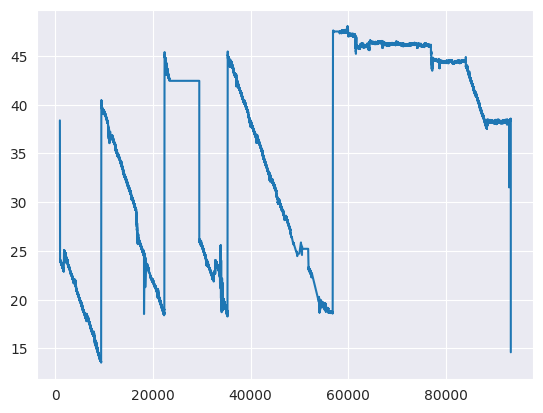

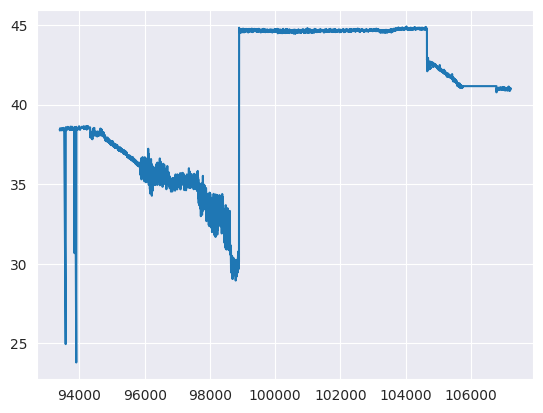

In [152]:
# Assume 'data' is your DataFrame and 'Fuel' is the column with fuel levels.
# Define the function to find segments after refueling
def find_segments_after_refueling(fuel_data, refuel_threshold):
    # Detect refueling points - where the fuel level jumps by 'refuel_threshold' or more
    refuel_points = np.where(np.diff(fuel_data) > refuel_threshold)[0] + 1
    
    # Initialize the list to store segments after refueling
    segments_after_refueling = []
    
    # Iterate through the refueling points and slice the data into segments after each refueling event
    for i, idx in enumerate(refuel_points):
        # The end of a segment is the next refueling point or the end of the dataset
        end_idx = refuel_points[i+1] if i+1 < len(refuel_points) else len(fuel_data)
        # Append the segment after refueling to the list
        segments_after_refueling.append(fuel_data[idx:end_idx])
    
    # Return the segments after refueling
    return segments_after_refueling

# Define the threshold for a refueling event
refuel_threshold = 15  # You can adjust this threshold as per your dataset

# Find the segments just after refueling
segments_after = find_segments_after_refueling(unnoisy_data['total_vol'], refuel_threshold)

# Example usage: print the first segment after refueling
for segment in segments_after:
    plt.figure()
    plt.plot(segment)

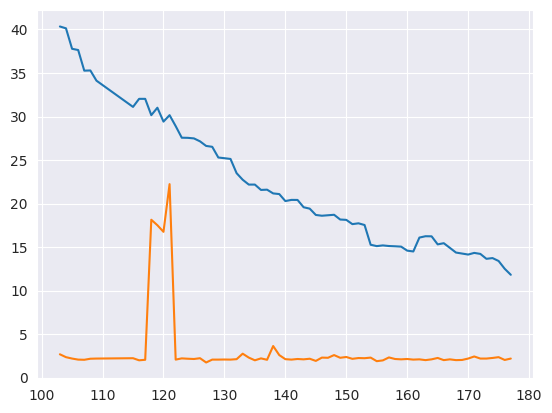

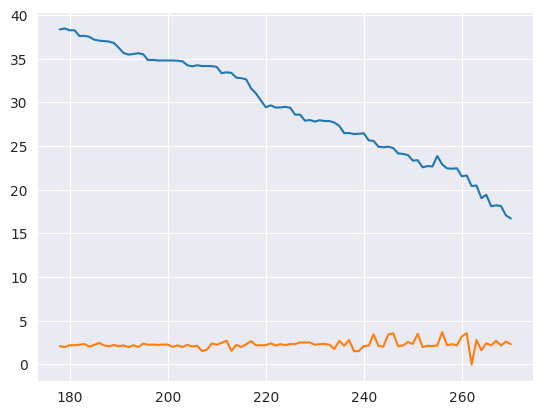

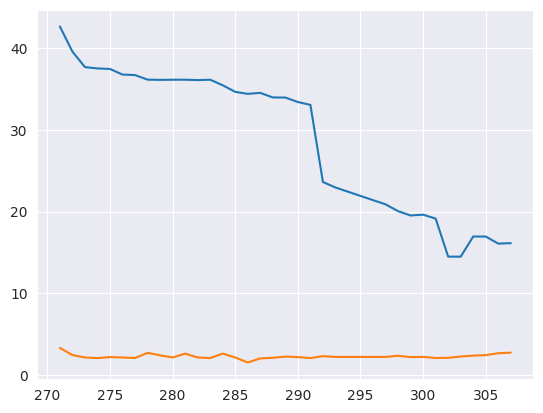

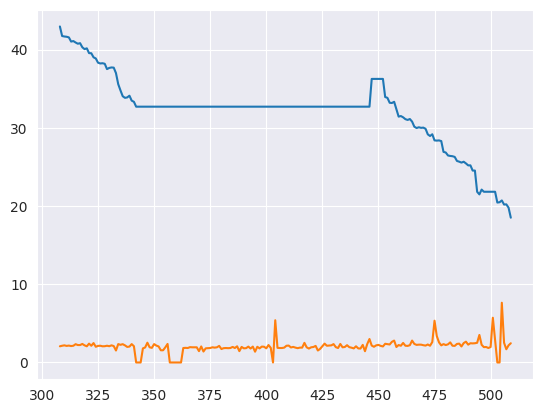

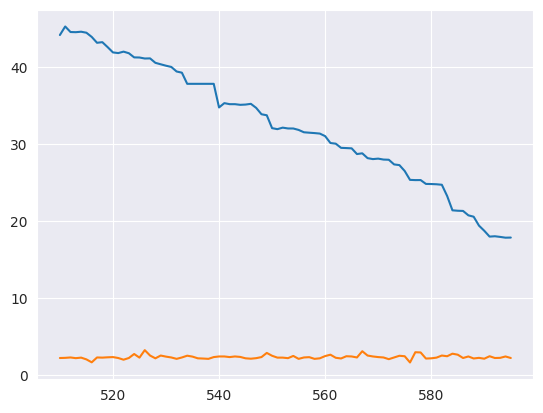

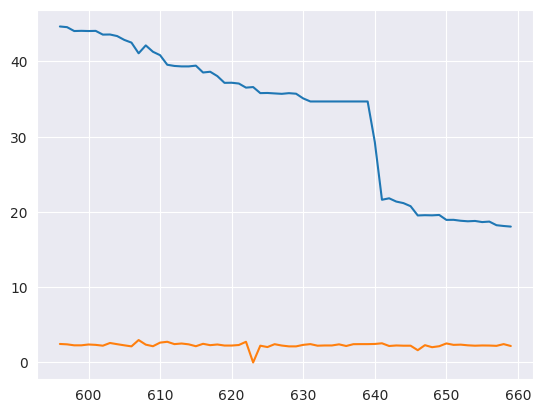

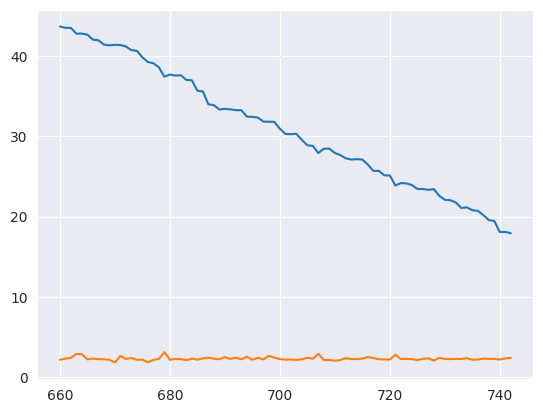

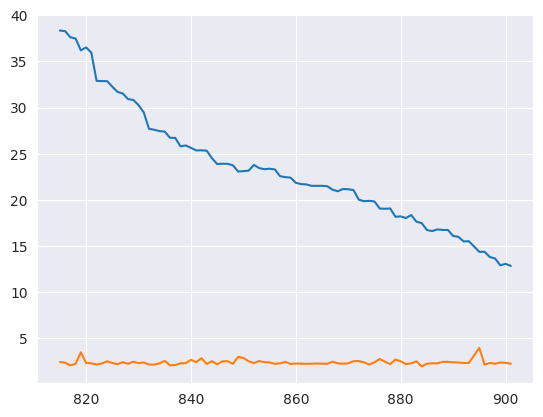

In [159]:
possible_segments = [1,2,3,4,5,6,7,9]

final_segments = []

for i in possible_segments:
    segment = segments_after[i]
    index = segment.index
    total_load = unnoisy_data.loc[index, "total_load"]/100
    plt.figure()
    plt.plot(segment)
    plt.plot(total_load)

<Axes: >

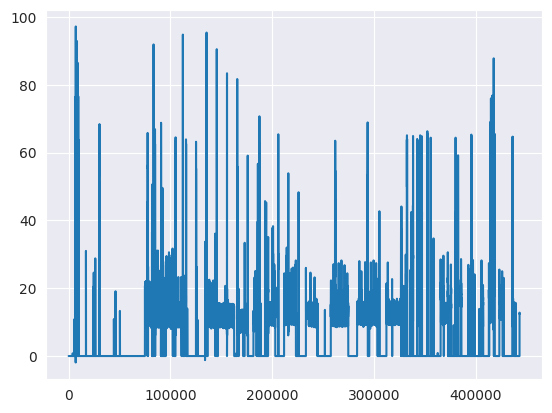

In [168]:
engine1["aIEngineLoadPercent"].plot()

In [156]:
index

Index([815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828,
       829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842,
       843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856,
       857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,
       885, 886, 887, 888, 889, 890, 891, 892, 893, 895, 896, 897, 898, 899,
       900, 901],
      dtype='int64')

<Axes: >

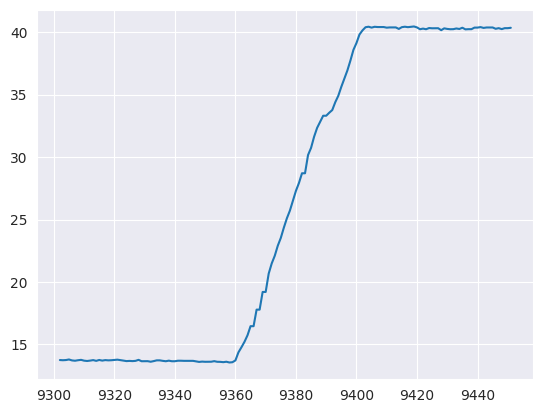

In [148]:
# Important segment that shows that refueling can be done much slower at a rate of 5

tmp_segment = segments_after[10]
tmp_segment[8400:8550].plot()
# segments_after_after = find_segments_after_refueling(segments_after[10], refuel_threshold)

# Fuel consumption analysis

In [17]:
mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")

/tmp/ipykernel_113746/2167716181.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")


<Axes: >

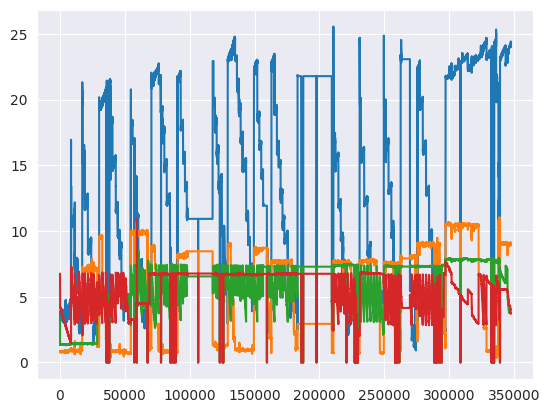

In [18]:
mgo["MGO_STOR_TK_C_CALC_VOL"].plot()
mgo["MGO_STOR_TK_S_CALC_VOL"].plot()
mgo["NO1_MGO_SERV_TK_CALC_VOL"].plot()
mgo["NO2_MGO_SERV_TK_CALC_VOL"].plot()

<Axes: >

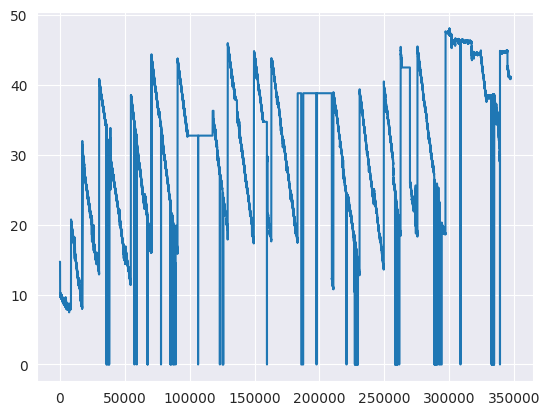

In [19]:
mgo["total_vol"] = mgo["MGO_STOR_TK_C_CALC_VOL"] + mgo["MGO_STOR_TK_S_CALC_VOL"] + mgo["NO1_MGO_SERV_TK_CALC_VOL"] + mgo["NO2_MGO_SERV_TK_CALC_VOL"]
mgo["total_vol"].plot()

<Axes: >

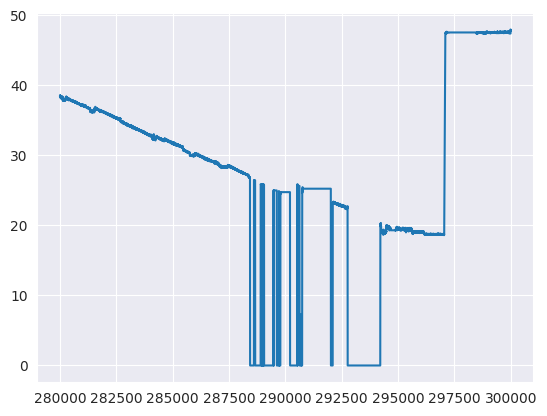

In [20]:
mgo["total_vol"][280000:300000].plot()

<Axes: >

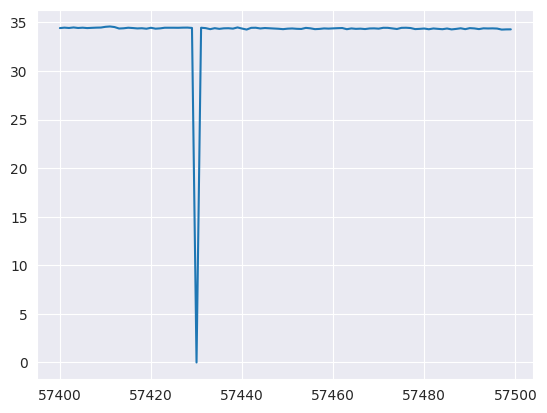

In [21]:
mgo["total_vol"][57400:57500].plot()

## Interpolation

In [22]:
# Identify valid indices where fuel level is non-zero
tmp = mgo.copy()
valid_indices = tmp[tmp["total_vol"] > 0].index
valid_fuel_levels = tmp.loc[valid_indices, "total_vol"]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels = f(valid_indices)

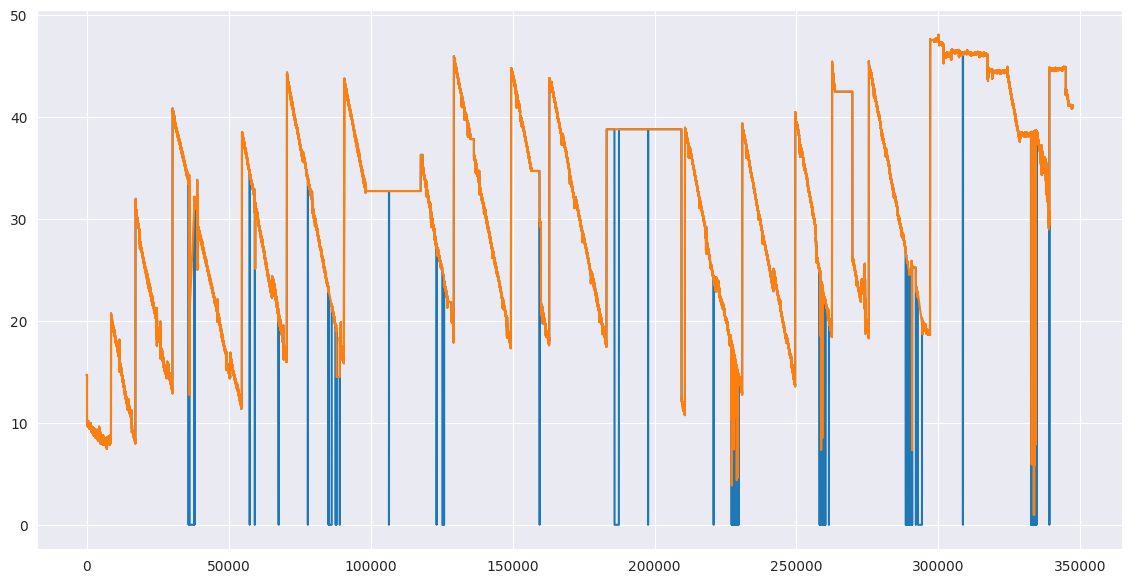

In [26]:
plt.figure(figsize=(14, 7))
mgo["total_vol"].plot()
plt.plot(valid_indices, interpolated_fuel_levels)

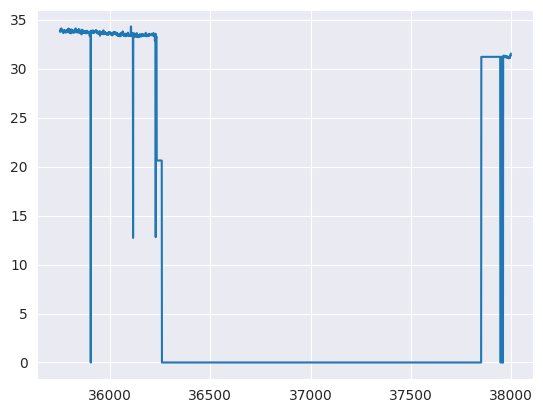

In [32]:
plt.figure()
noise1 = mgo["total_vol"][35750:38000].plot()

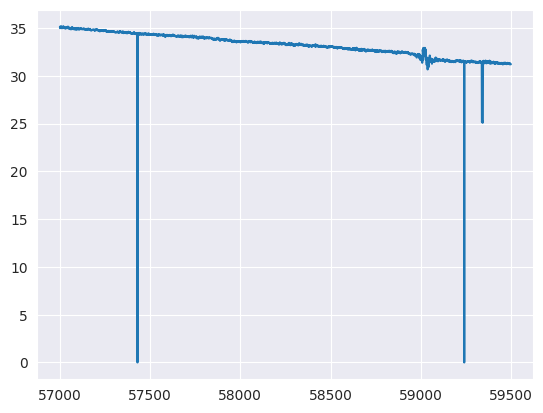

In [35]:
plt.figure()
noise2 = mgo["total_vol"][57000:59500].plot()

<Axes: >

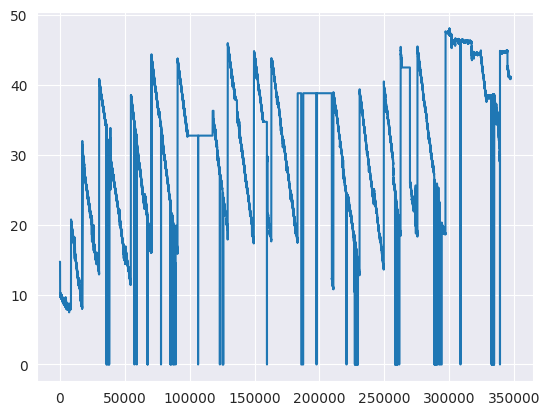

In [40]:
tmp["total_vol"].plot()

## Identify noisy segments

In [78]:
# Define a function to detect noise segments and correct them
def correct_noise_segments(volume_data, noise_value=7):
    corrected_data = np.copy(volume_data)
    is_noise = corrected_data < noise_value
    # Start and end indices of the noisy sequences
    noise_start_indices = np.where(np.diff(is_noise.astype(int)) == 1)[0] + 1
    noise_end_indices = np.where(np.diff(is_noise.astype(int)) == -1)[0] + 1

    # If the noise starts from the first data point, we assume the first non-noise value
    # as the start value for interpolation
    if is_noise[0]:
        noise_start_indices = np.insert(noise_start_indices, 0, 0)
        corrected_data[0] = corrected_data[noise_end_indices[0]]
    
    # Similarly, if the noise extends to the last data point, we use the last non-noise value
    if is_noise[-1]:
        noise_end_indices = np.append(noise_end_indices, len(is_noise) - 1)
        corrected_data[-1] = corrected_data[noise_start_indices[-1] - 1]

    # Perform interpolation for the sequences
    for start, end in zip(noise_start_indices, noise_end_indices):
        corrected_data[start:end] = np.interp(
            x=np.arange(start, end),
            xp=[start - 1, end],
            fp=[corrected_data[start - 1], corrected_data[end]]
        )

    return corrected_data

# Correct the noise in the volume data
unnoisy = correct_noise_segments(tmp['total_vol'].values)

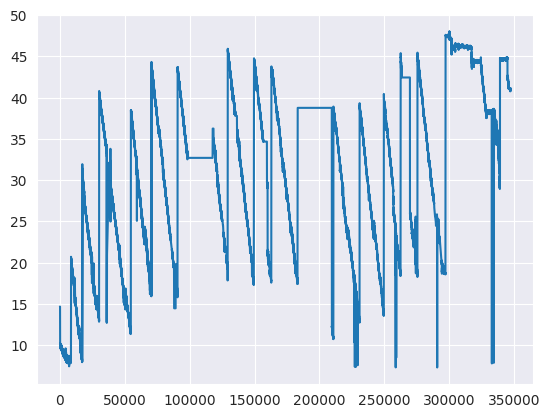

In [79]:
plt.plot(unnoisy)

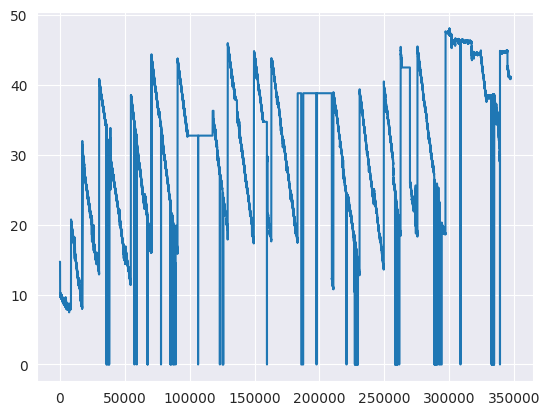

In [71]:
plt.plot(tmp["total_vol"])

<Axes: >

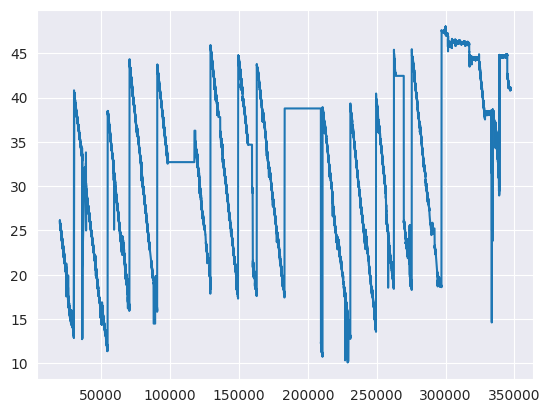

In [93]:
tmp = mgo["total_vol"][20000:].copy()
tmp[tmp>10].plot()

In [86]:
# Define a function to detect the start and end of refueling segments and correct noise
def detect_and_correct_noise(data, drop_threshold, refuel_threshold):
    # Convert the series to a numpy array for efficiency
    fuel_levels = data.values.flatten()
    
    # Identify refueling points where there is a sharp increase
    refuel_points = np.where(np.diff(fuel_levels) > refuel_threshold)[0] + 1
    
    # Initialize the start of the first segment
    segments = [(0, refuel_points[0] if refuel_points.size > 0 else len(fuel_levels))]

    # Identify all segments based on refueling points
    for i in range(len(refuel_points)):
        start = refuel_points[i]
        end = refuel_points[i + 1] if i + 1 < len(refuel_points) else len(fuel_levels)
        segments.append((start, end))

    return segments

    # # Correct noise within each segment
    # for start, end in segments:
    #     segment = fuel_levels[start:end]
    #     drops = np.where(np.diff(segment) < -drop_threshold)[0] + start + 1
    #     for drop in drops:
    #         if drop != start and drop != end - 1:  # Ignore drops at the segment boundaries
    #             # Set noisy points to NaN for later interpolation
    #             fuel_levels[drop] = np.nan
    
    # import pdb
    # pdb.set_trace()

    # # Interpolate to fill the NaN values
    # corrected_levels = pd.Series(fuel_levels).interpolate().values
    
    # return corrected_levels

# Define the threshold for noise and refueling
drop_threshold = 3  # Define the drop threshold for noise
refuel_threshold = 3  # Define the increase threshold for refueling

# Correct the noise in the fuel data using the defined thresholds
segments = detect_and_correct_noise(mgo['total_vol'], drop_threshold, refuel_threshold)

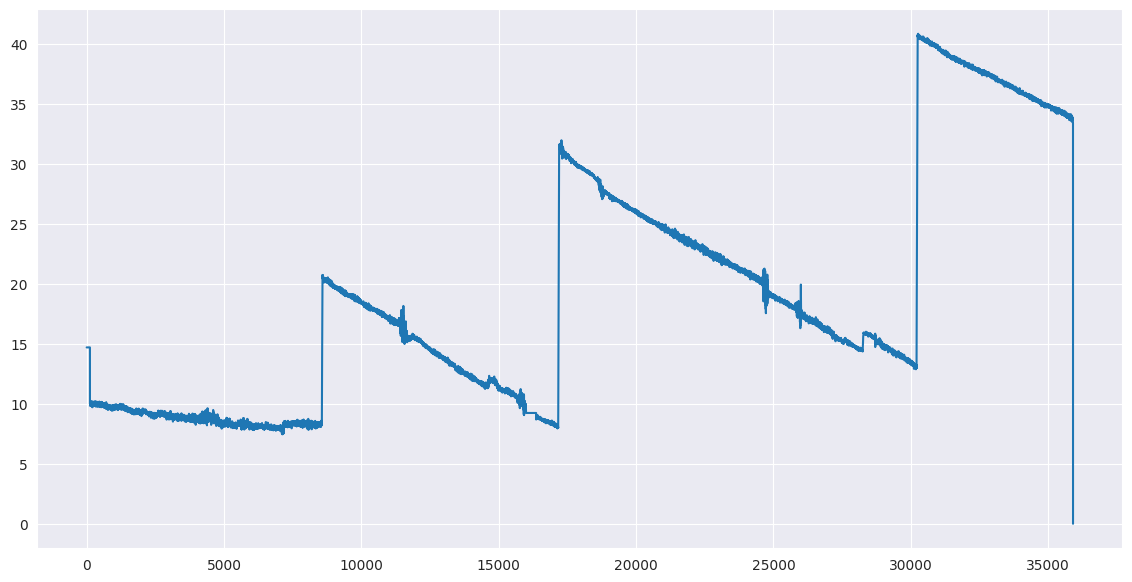

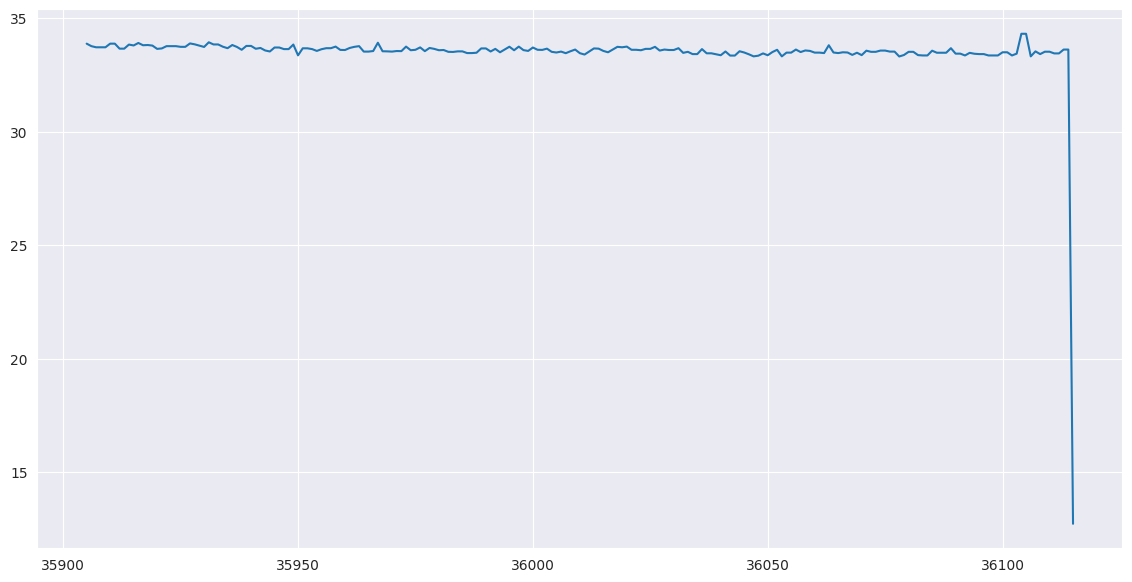

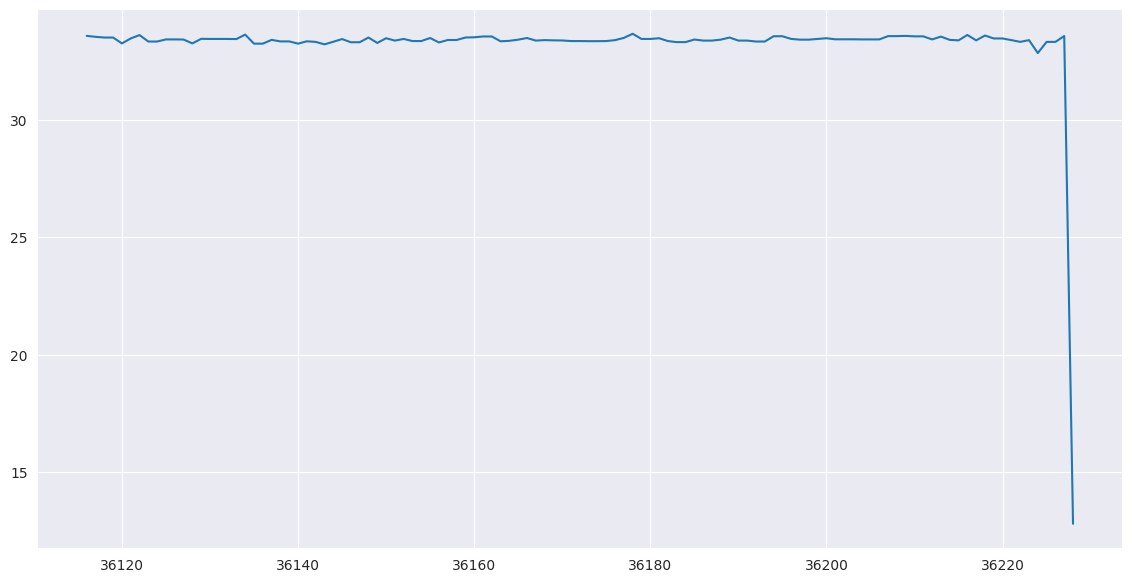

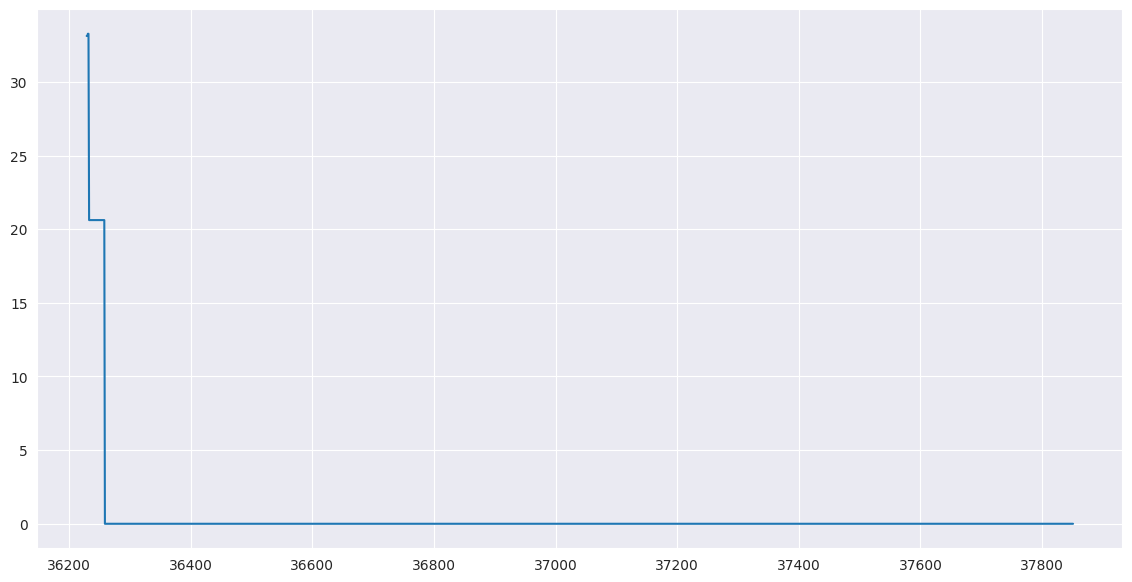

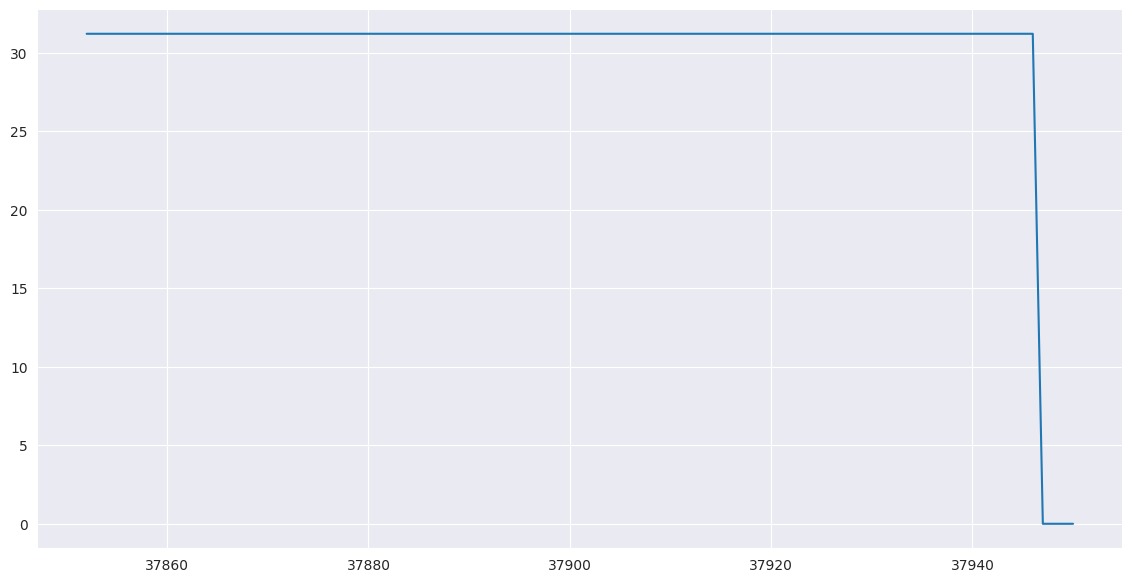

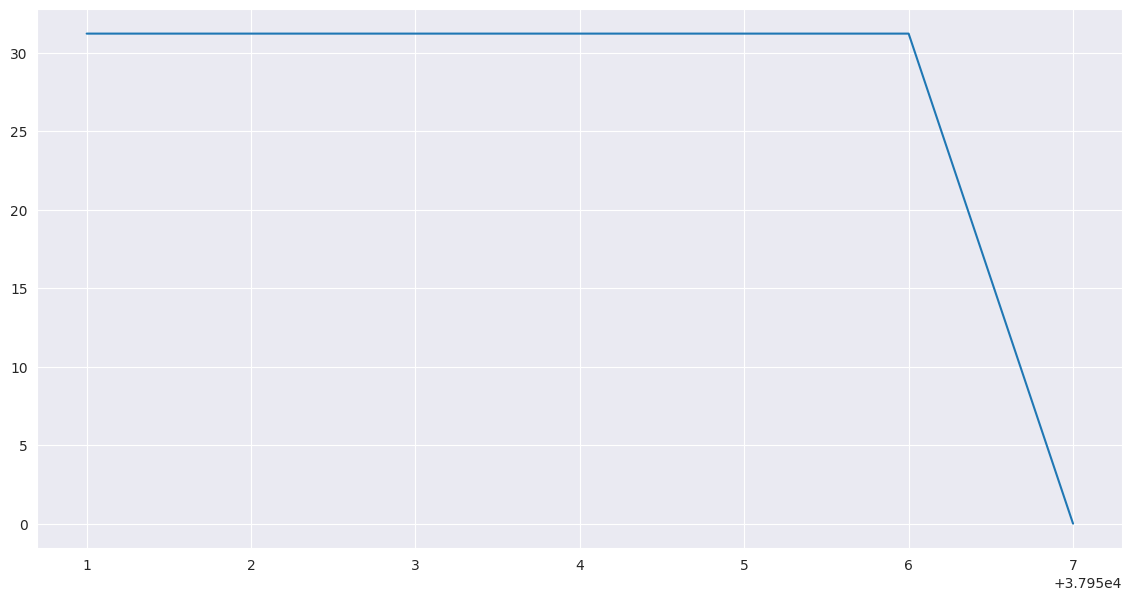

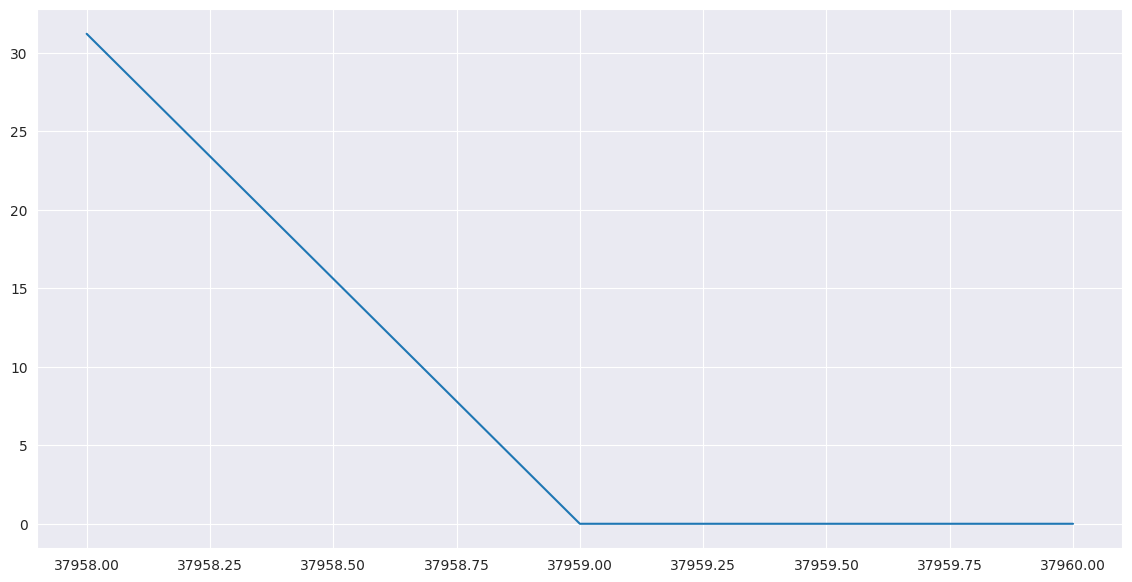

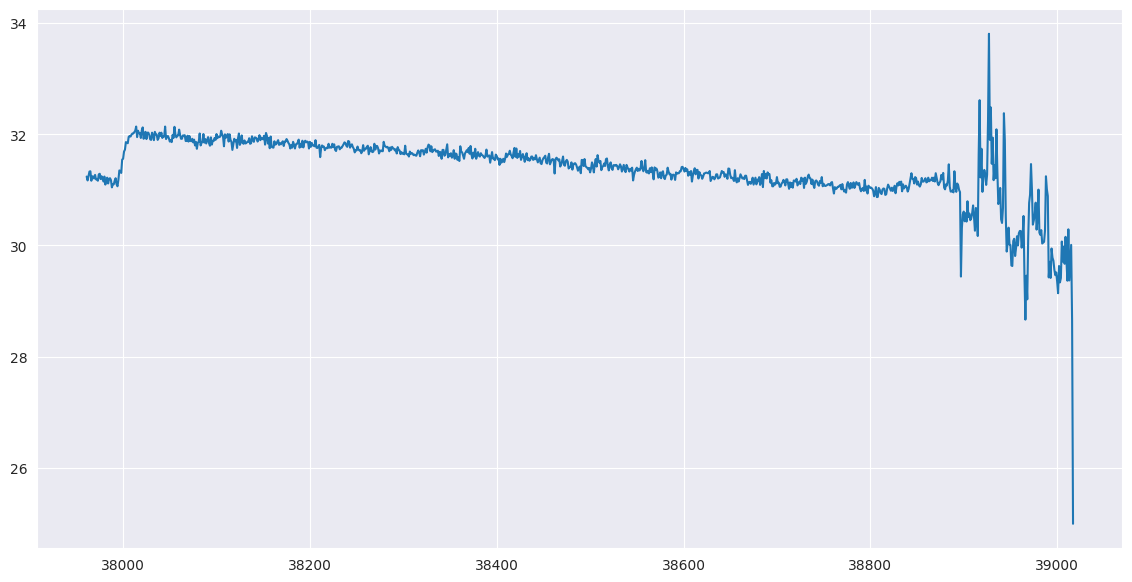

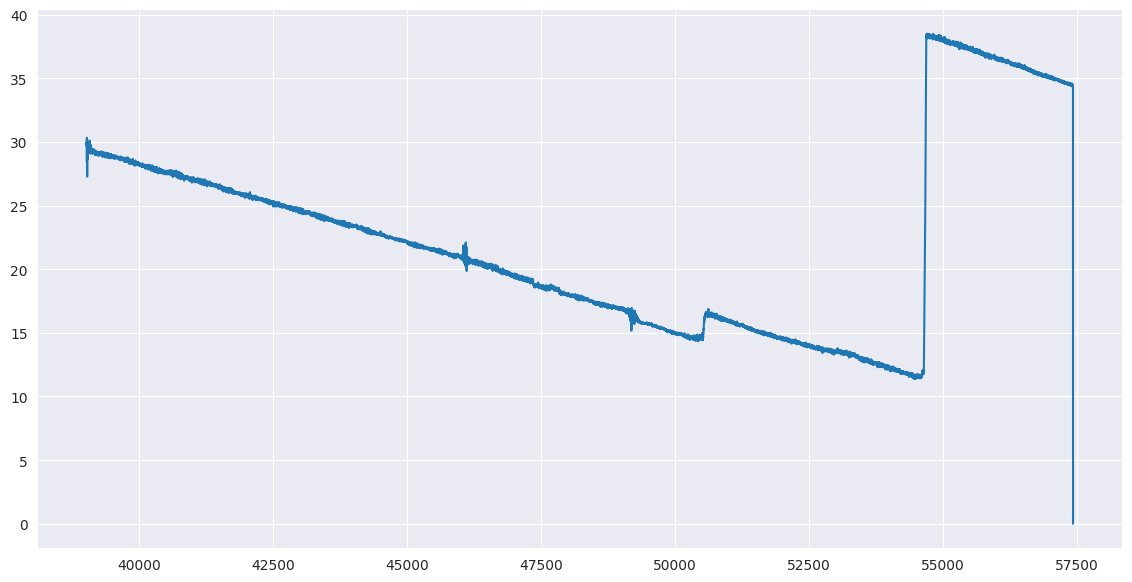

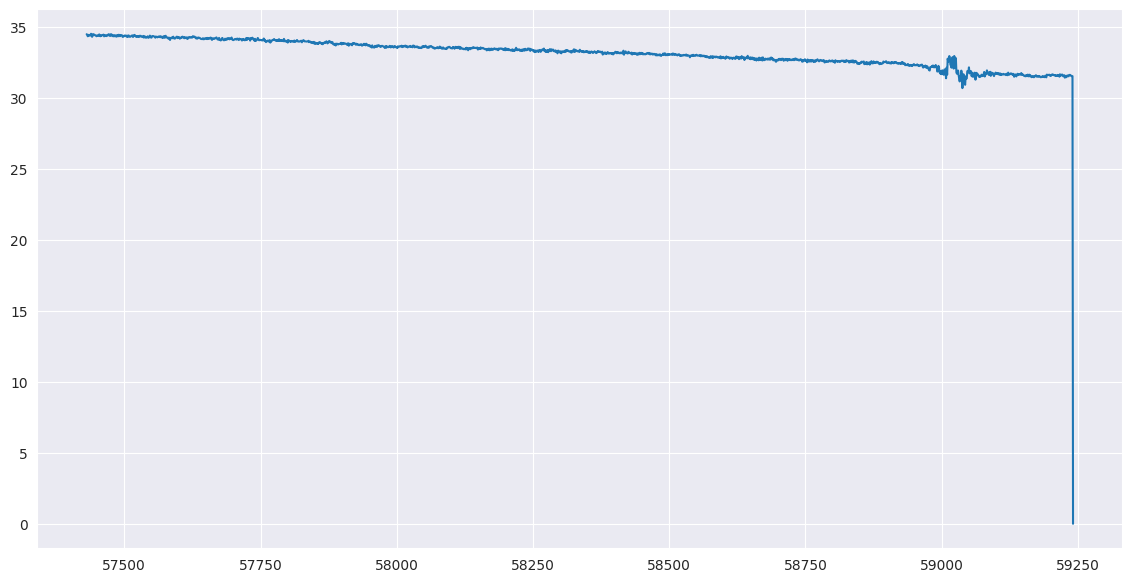

In [90]:
tmp = mgo["total_vol"].copy()

for start, end in segments[:10]:
    plt.figure(figsize=(14, 7))
    segment = tmp[start:end]
    segment.plot()

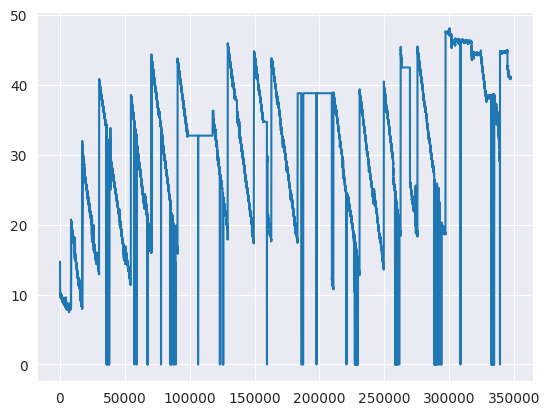

In [81]:
plt.plot(tmp)

# Finding the start and end point of the line containing the noise

In [76]:
tmp2 = mgo["total_vol"][30000:54720].copy()
valid_indices = tmp2[tmp2 > 0].index
valid_fuel_levels = tmp2.loc[valid_indices]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels2 = f(valid_indices)

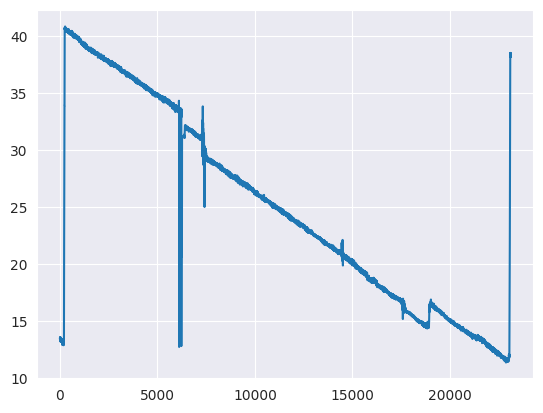

In [77]:
plt.plot(interpolated_fuel_levels2)

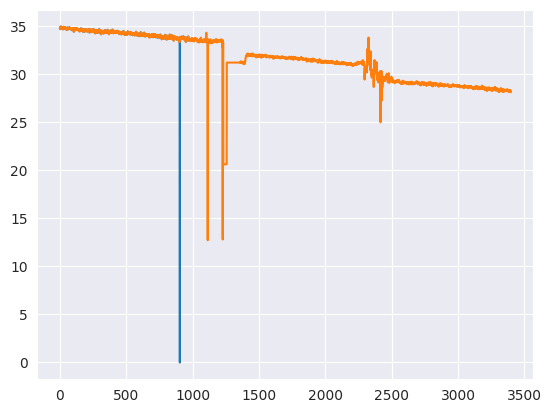

In [89]:
tmp2 = mgo["total_vol"][35000:40000].copy()
valid_indices = tmp2[tmp2 > 0].index
valid_fuel_levels = tmp2.loc[valid_indices]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels2 = f(valid_indices)

mgo["total_vol"][35000:36000].reset_index(drop=True).plot()
plt.plot(interpolated_fuel_levels2)

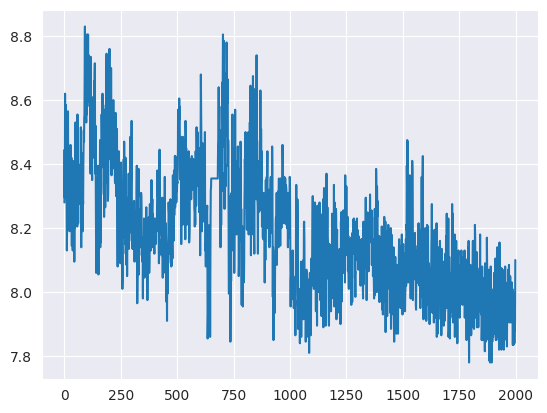

In [80]:
tmp3 = mgo["total_vol"][5000:7000].copy()
valid_indices = tmp3[tmp3 > 0].index
valid_fuel_levels = tmp3.loc[valid_indices]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels3 = f(valid_indices)

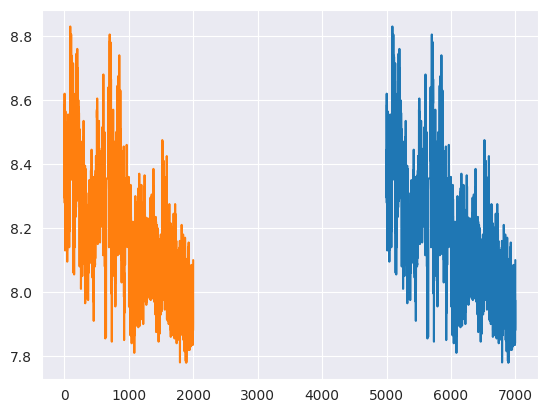

In [82]:
plt.plot(mgo["total_vol"][5000:7000])
plt.plot(interpolated_fuel_levels3)

<Axes: >

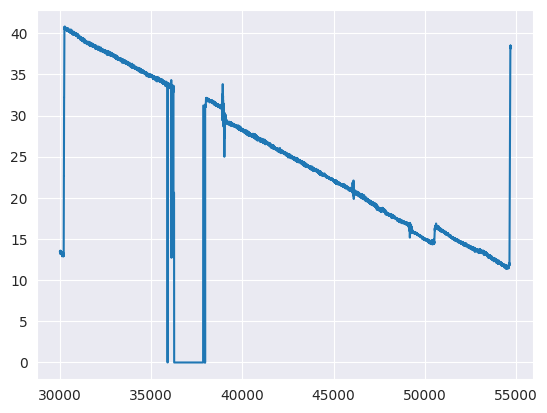

In [53]:
mgo["total_vol"][30000:54720].plot()

In [75]:
mgo["total_vol"][30000:54720].to_csv("noisy.csv", index=False)

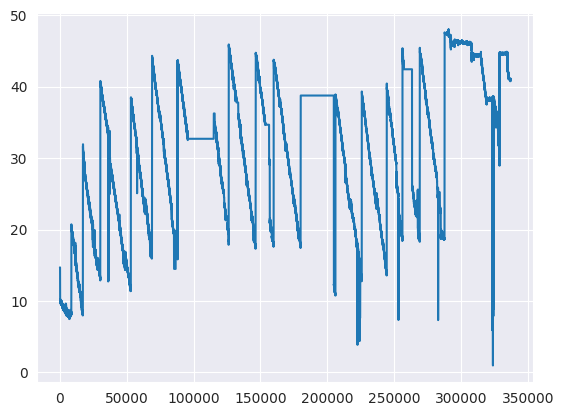

In [25]:
plt.plot(interpolated_fuel_levels)

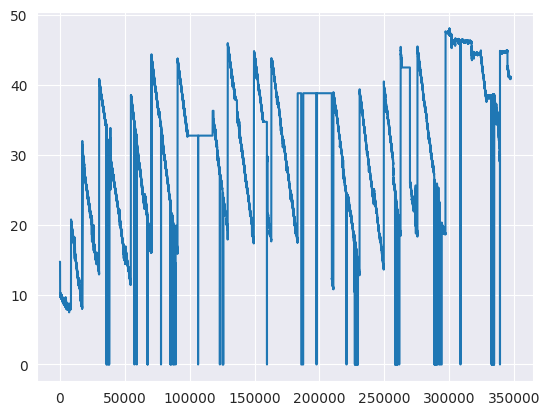

In [26]:
plt.plot(mgo["total_vol"])

In [21]:
valid_fuel_levels.shape

(337234, 23)

<Axes: >

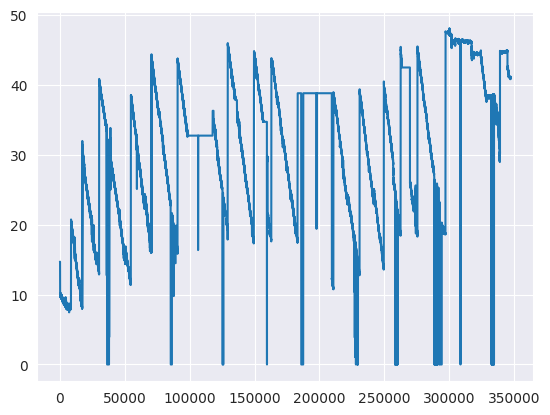

In [48]:
tmp["total_vol"].plot()

<Axes: >

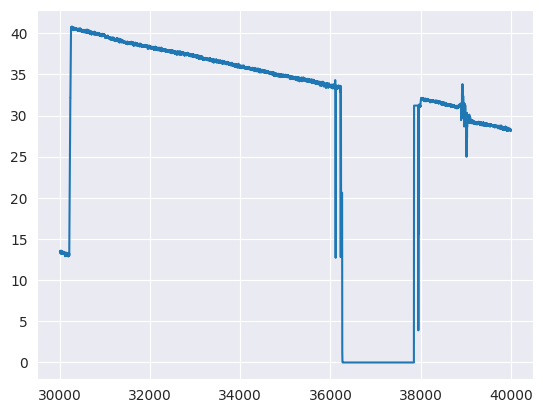

In [50]:
tmp["total_vol"][30000:40000].plot()

In [38]:
tmp

Unnamed: 0                  time E_G_MGO_TK_LEVEL_L  \
0                0  2022-12-09T01:48:00Z               True   
1                1  2022-12-09T01:49:00Z               True   
2                2  2022-12-09T01:50:00Z               True   
3                3  2022-12-09T01:51:00Z               True   
4                4  2022-12-09T01:52:00Z               True   
...            ...                   ...                ...   
347407      347407  2023-08-25T07:05:00Z              False   
347408      347408  2023-08-25T07:06:00Z              False   
347409      347409  2023-08-25T07:07:00Z              False   
347410      347410  2023-08-25T07:08:00Z              False   
347411      347411  2023-08-25T07:09:00Z              False   

        MGO_STOR_TK_C_CALC_VOL  MGO_STOR_TK_C_LEVEL  MGO_STOR_TK_S_CALC_VOL  \
0                         3.83             10.00000                     0.8   
1                         3.83             10.00000                     0.8   
2                         3.83             10.00000                     0.8   
3                         3.83             10.00000                     0.8   
4                         3.83             10.00000                     0.8   
...                        ...                  ...                     ...   
347407                   24.29             82.12010                     9.0   
347408                   24.29             81.96730                     9.0   
347409                   24.29             82.26920                     9.0   
347410                   24.29             82.58475                     9.0   
347411                   24.29             82.40875                     9.0   

        MGO_STOR_TK_S_LEVEL  NO1_MGO_SERV_TK_CALC_VOL  NO1_MGO_SERV_TK_LEVEL  \
0                  10.00000                      3.30               36.93730   
1                  10.00000                      3.30               36.87670   
2                  10.00000                      3.30               36.93070   
3                  10.00000                      3.30               36.99055   
4                  10.00000                      3.30               36.89720   
...                     ...                       ...                    ...   
347407             65.23340                      3.99               96.69730   
347408             65.43560                      3.99               96.85815   
347409             65.33920                      3.99               96.85855   
347410             65.14410                      3.99               96.83425   
347411             65.32035                      3.99               96.90215   

        NO1_WB_TK_C_CALC_VOL  ...  NO2_WB_TK_P_CALC_VOL  NO2_WB_TK_P_LEVEL  \
0                       1.75  ...                 35.09          163.47100   
1                       1.75  ...                 35.09          163.37450   
2                       1.75  ...                 35.09          163.38700   
3                       1.75  ...                 35.09          163.33350   
4                       1.75  ...                 35.09          163.37300   
...                      ...  ...                   ...                ...   
347407                  4.08  ...                  4.56           36.39975   
347408                  4.08  ...                  4.56           36.50995   
347409                  4.08  ...                  4.56           36.54865   
347410                  4.08  ...                  4.56           36.46245   
347411                  4.08  ...                  4.56           36.45760   

        NO2_WB_TK_S_CALC_VOL  NO2_WB_TK_S_LEVEL  NO3_WB_TK_P_CALC_VOL  \
0                      29.99           175.1360                 15.41   
1                      29.99           175.1515                 15.41   
2                      29.99           175.2325                 15.41   
3                      29.99           175.3105                 15.41   
4                      29.99           